vgames2.csv를 이용하여, "다음 분기에 어떤 게임을 설계해야 할까."라는 고민을 해결하고자 한다.

제출은 AI_OO_김코딩_section1로, 제출.

  - vgames2에 관하여...
 - Name : 게임의 이름입니다.
 - Platform : 게임이 지원되는 플랫폼의 이름입니다.
 - Year : 게임이 출시된 연도입니다.
 - Genre : 게임의 장르입니다.
 - Publisher : 게임을 배급한 회사입니다.
 - NA_Sales : 북미지역에서의 출고량입니다.
 - EU_Sales : 유럽지역에서의 출고량입니다.
 - JP_Sales : 일본지역에서의 출고량입니다.
 - Other_Sales : 기타지역에서의 출고량입니다.

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
  - 지역은 어떻게 구분했나요?
- 지역별로 선호하는 게임의 장르를 파악했나요?
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
  - 트렌드는 어떤 것을 기준으로 파악했나요?
- 연도별로 트렌드가 존재하나요?
- 왜 존재한다/존재하지 않는다고 생각했나요?
- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
  - 인기가 많다는 것을 어떻게 정의했나요?
- 해당 게임이 왜 인기가 많다고 생각했나요?
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?
  - 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.



더불어 유의미한 인사이트를 도출하기 위해서는

- 다음 분기가 언제인지
- 회사의 규모는 어느정도인지

와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.

---
기본 설정
--

In [1]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/angi219/Works_and_Presentation/main/vgames2.csv")
#03/09 웹 크롤링한 문서
vgsales = pd.read_csv("https://raw.githubusercontent.com/angi219/Works_and_Presentation/main/vgsales.csv")
#03/10 추가본
vgdate = pd.read_csv("https://raw.githubusercontent.com/angi219/Works_and_Presentation/main/vgdate.csv")

In [4]:
#Clean 파일 복사
df_clean = df
vgsales_clean = vgsales
vgdate_clean = vgdate

---
df 살펴보기
--

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df.Year.value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [7]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
df.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

---
사전 계획에 대하여.
--

원래 모든 결측치를 삭제하려고 했으나, 도중에 했던 모든 코드를 폐기했었다. 이에 대한 사유다.
- 일단 Year나, Genre, Publisher 값을 모두 폐기함으로서 자료 그대로의 신뢰성을 얻을 수 있을거라고 생각하기 때문.
- 결측치 열을 다 추출해서 바른데로 넣는 방법도 있는데, 이때는 시간 손실이 심해질 수도 있거니와 일단 df_clean으로 원래 값을 살려놨기 때문에 추후에 필요하다면 넣을 수 있기 때문에 일단을 모두 삭제 해놨다.
  - 만약 정밀한 값이 필요하다고 생각될 경우 바로 넣을 수 있게 준비할 예정이다.
- 주요 분포를 미리 만들어 수치화 시키는 것이 중요하다고 생각했다. 미리 수치화 시켜서 정밀값과 EDA로 필요없다고 여기는 부분 모두 비교가 가능하기 때문이다.
  - EDA로 필요 없다고 생각 하는 값 모두 충분히 결격 사유가 될 수 있기 때문이다. 데이터 크롤링으로 했다고 해도 누락된 부분은 이미 불확실성이 있다고 여길 수 있기 때문이다.
  - 물론 앞에서 먼저저 써놨듯 좀 더 정밀한 데이터로 만들 경우 불가능 한 것은 아니다.

---

이 경우 다음과 같이 행동할 수 있다.

1. 데이터 크롤링을 하여, df를 교집합 시킨다.
2. 수기로 df를 체워놓는다.
3. 결측치 있는 값을 불량으로 취급하여 값에서 아에 제외 시킨다.

---
현재 목표는 정확한 데이터 판단을 통해 통찰력 있는 판단을 바라는 것이므로 1,2번으로 할 수 있다. 조금의 결측치와 이상치를 제외한다면, 기존의 df도 쓸만한 자료이므로 EDA를 이용해서 데이터를 다듬는게 좋을 것 같다.

웹 스크래핑을 이용해서 두 수치의 값을 비교할 계획이라서 이또한 작업해놓는다.

---
웹 스크래핑 작업
--

In [15]:
from bs4 import BeautifulSoup
import urllib

In [18]:
urlhead = 'https://www.vgchartz.com/games/games.php?'
urltail = 'name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=1000&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showpublisher=1&showvgchartzscore=0&showvgchartzscore=1&shownasales=0&shownasales=1&showdeveloper=0&showcriticscore=0&showcriticscore=1&showpalsales=0&showpalsales=1&showreleasedate=0&showreleasedate=1&showuserscore=0&showuserscore=1&showjapansales=0&showjapansales=1&showlastupdate=0&showlastupdate=1&showothersales=0&showothersales=1&showshipped=0&showshipped=1'

In [24]:
pages = 5
rec_count = 0

name = []
publisher = []
sales_na = []
sales_jp = []
realese = []

In [25]:
for page in range(1, pages):
    surl = urlhead + str(page) + urltail
    r = urllib.request.urlopen(surl).read()
    soup = BeautifulSoup(r, features="lxml")
    print(page)
    chart = soup.find('div', id='generalBody').find('table')
    for row in chart.find_all('tr')[3:]:
        try:
            col = row.find_all('td')

            column_1 = col[3].find('a').string.strip() #name
            column_2 = col[5].string.strip() #publisher
            column_3 = col[10].string.strip() #NAsale
            column_4 = col[12].string.strip() #JPsale
            column_5 = col[14].string.strip() #Realese

            name.append(column_1)
            publisher.append(column_2)
            sales_na.append(column_3)
            sales_jp.append(column_4)
            realese.append(column_5)

            rec_count += 1

        except:
            print('Got Exception') #예외 처리됨. (결측치나 다른 오류 대비)
            continue

print (rec_count)

1
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got Exception
Got 

In [29]:
columns = {'Name': name, 'Publisher': publisher, 'NA_sales': sales_na, 'JP_sales': sales_jp, 'Realese': realese}

In [30]:
vgsales = pd.DataFrame(columns)
print(vgsales)
vgsales = vgsales[['Name', 'Publisher', 'NA_sales', 'JP_sales', 'Realese']]

Empty DataFrame
Columns: [Name, Publisher, NA_sales, JP_sales, Realese]
Index: []


---
DF EDA
--

In [5]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


1. Index와 동일한 역할을 하는 Unnamed: 0 칼럼 삭제

In [6]:
df = df.drop('Unnamed: 0', axis=1)

2. Year 칼럼 검사

In [7]:
print(df['Year'].dtype)

float64


In [8]:
print(df['Year'].describe())

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64


In [9]:
df['Year'] = df['Year'].fillna(0).astype(int)
df['Year'] = df['Year'].replace(0, np.nan)
df = df.dropna(subset=['Year'])

<AxesSubplot:xlabel='Year'>

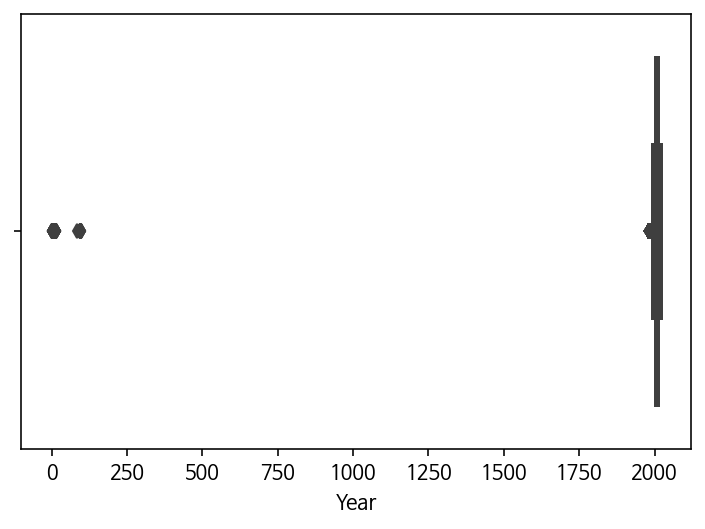

In [10]:
import seaborn as sns
sns.boxplot(x=df['Year'])

In [11]:
# "Year" 칼럼에서 이상값을 찾는다.
is_outlier = (df["Year"] < 1900) | (df["Year"] > 2023)

# 이상값의 갯수를 구함
num_outliers = is_outlier.sum()
num_outliers

97

In [15]:
#16000여개의 샘플에서 1%도 안되는 값이기 때문에 97개정도 삭제해도 무방하다고 생각한다.

In [12]:
df = df.drop(df[is_outlier].index) #이상치 삭제

In [13]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [14]:
df['Year'].min()

1980

In [15]:
df['Year'].max()

2020

In [16]:
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16222,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16223,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16224,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16225,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


3. 판매량 칼럼 조사
- 잠깐 csv 파일일 때, ms excel로 확인해 보니 문자열이 있던거 확인함.

In [17]:
import re

# 각 칼럼에 대해서
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    # 1. 데이터 타입이 문자열인지 확인
    if df[col].dtype == 'object':
        # 2. 문자열 중 숫자와 소수점 이외의 문자열이 있는지 확인
        pattern = r'[^\d.]'
        match = df[col].str.contains(pattern)
        unique_matches = df[match][col].unique()
        if len(unique_matches) > 0:
            print(f"{col}에서 문자열 발견!: {unique_matches}")

NA_Sales에서 문자열 발견!: ['480K' '60K' '0K' '0.58M' '0.25M' '5.55M' '0.14M' '1.23M' '0M' '0.06M'
 '1.13M' '0.31M' '490K' '240K' '0.05M' '150K' '0.13M' '4100K' '5170K'
 '0.61M' '20K' '30K' '0.02M' '0.11M' '0.01M' '0.36M' '50K' '70K' '190K'
 '0.43M' '1210K' '1610K' '100K' '170K' '0.9M' '40K' '450K' '220K' '1.11M'
 '310K' '0.07M' '820K' '80K' '290K' '130K' '2.66M' '1.18M' '0.55M' '120K'
 '0.08M' '0.22M' '0.3M' '0.04M' '1780K' '2930K' '0.15M' '0.1M' '0.29M'
 '280K' '0.37M' '0.12M' '540K' '9.63M' '0.34M' '0.26M' '550K' '2010K'
 '10K' '770K' '7.03M' '340K' '90K' '600K' '0.46M' '0.03M' '2570K' '0.72M'
 '0.96M' '270K' '420K' '0.28M' '0.45M' '720K' '0.53M' '470K' '320K']
EU_Sales에서 문자열 발견!: ['0.33M' '0.03M' '0K' '50K' '0.01M' '0.27M' '0.15M' '620K' '760K' '80K'
 '20K' '0M' '40K' '2560K' '440K' '280K' '10K' '0.11M' '660K' '0.32M'
 '0.04M' '0.79M' '0.16M' '0.61M' '30K' '130K' '0.05M' '0.66M' '0.21M'
 '70K' '0.02M' '210K' '1.24M' '1350K' '110K' '0.19M' '2.85M' '370K'
 '2.93M' '2130K' '0.06M' '190K' '10

In [18]:
def convert_sales(sales):
    if 'M' in sales:
        return float(sales.replace('M', ''))
    elif 'K' in sales:
        return float(sales.replace('K', '')) / 1000
    else:
        return float(sales)

In [19]:
#문자열을 발견한 대로 모두 값을 곱할 변수 convert_sales를 이용하여 적용
df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales)
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales)

In [20]:
df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)

In [21]:
#판매량 컬럼을 모두 더해 전체 판매량 컬럼으로 재창조한다.
df['Total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [23]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16222,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16223,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16224,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16225,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


---
시각화
--

관점1 - 일단 판매량 관련은 목적에 맞게 2010년 이후로 측정하는게 좋아보임.

관점2 - 플렛폼별 판매량을 시각화하는게 어떤 플랫폼을 선택할지 유리해보임.

In [24]:
platform_sales = df.groupby('Platform')['Total_sales'].sum().reset_index()

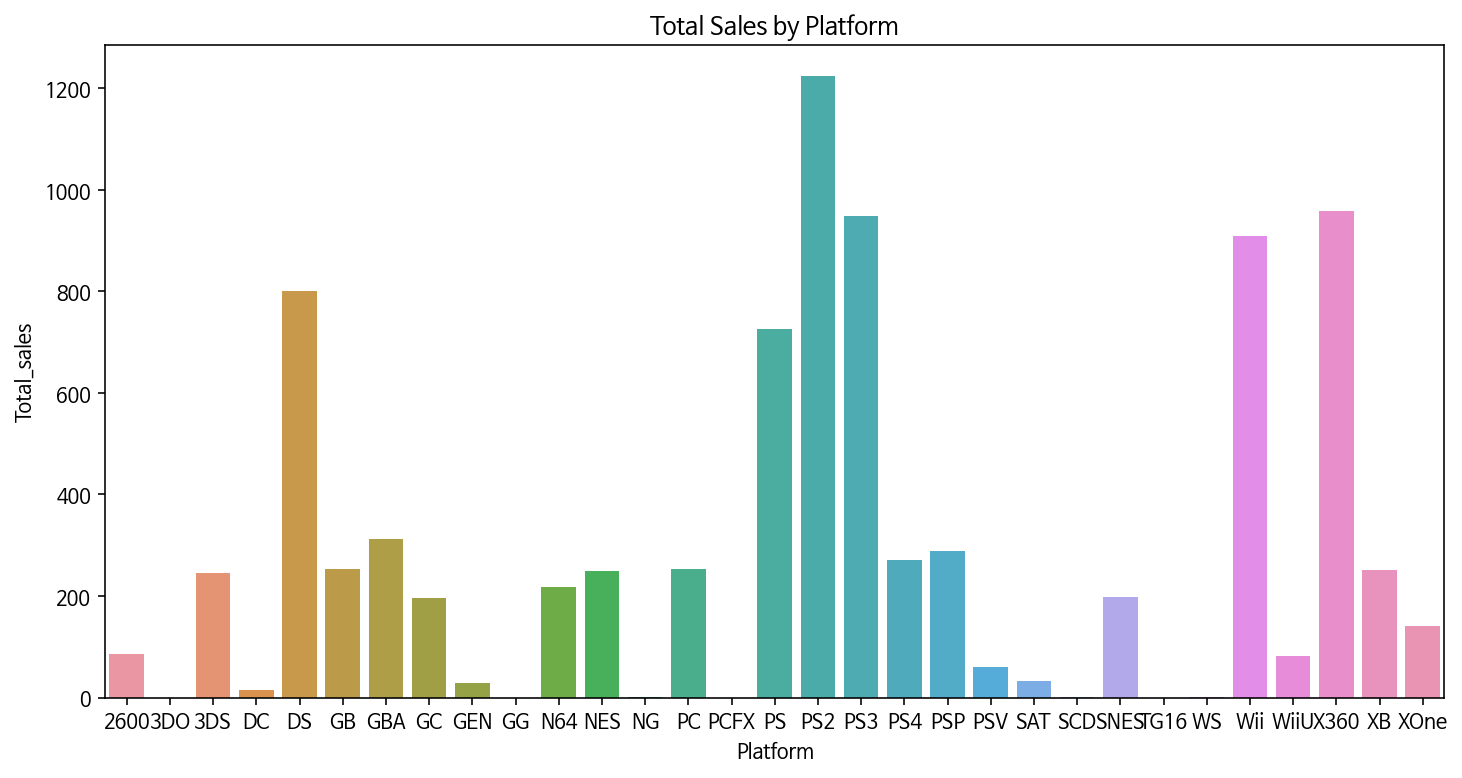

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=platform_sales, x='Platform', y='Total_sales')
plt.title('Total Sales by Platform')
plt.show()

관점3 - 모든 플렛폼이 필요하지 않음.

관점4 - 따라서 2010년 이후로 판매량이 갱신된 플렛폼만 보여주게 할 필요가 있음.

In [26]:
df_after_2010 = df[df['Year'] >= 2010].copy() #관점4의 의견에 따라 2010년 이전의 게임은 모두 삭제함.

In [27]:
df_after_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
16210,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16217,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16219,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16224,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


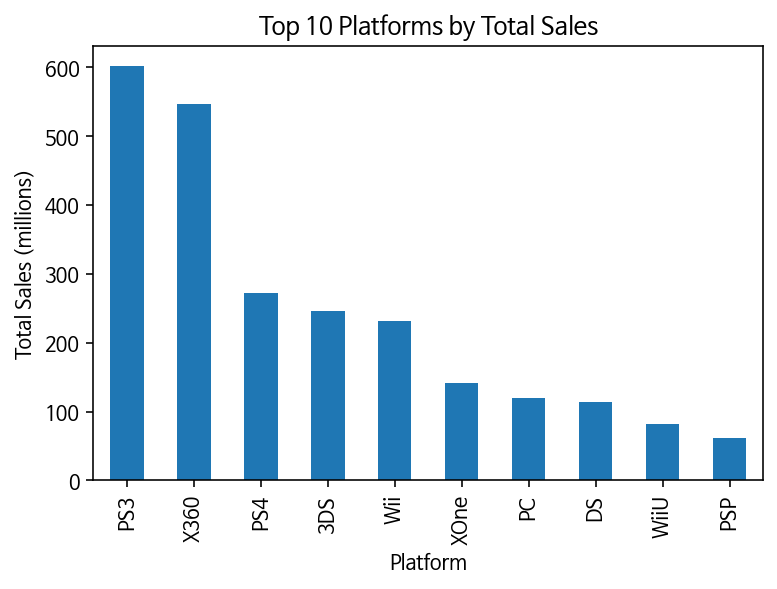

In [28]:
# 플랫폼별 Total_sales 값을 막대 그래프로 시각화
df_after_2010.groupby('Platform')['Total_sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Platforms by Total Sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

좀 더 자료의 정확도 및 현황을 보기 위해해 상하위 5%를 걸러서 본다면 좀더 정확한 값을 측정할 수 있을 것임.

In [29]:
df_2010 = df_after_2010

In [30]:
df_2010_sorted = df_2010.sort_values('Total_sales')

In [31]:
n = len(df_2010_sorted)
df_2010_trimmed = df_2010_sorted.iloc[int(n*0.05):int(n*0.95)]

In [ ]:
df_2010_trimmed

시각화 1 - 장르 분석

1-1 장르 선호도
--

In [33]:
temp_genre = df_2010[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_sales']]
temp_genre.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량', '총판매량']
temp_grouped = temp_genre.groupby(['장르']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량', '총판매량']
temp_table.head()

,장르,미국 판매량,유럽 판매량,일본 판매량,나머지 국가 판매량,총판매량
0,Action,286.43,234.96,70.31,77.83,669.53
1,Adventure,20.64,19.07,15.26,5.84,60.81
2,Fighting,38.56,20.77,13.35,8.45,81.13
3,Misc,123.15,64.23,21.05,20.17,228.60
4,Platform,55.47,38.69,15.75,10.84,120.75


In [34]:
temp_melted = pd.melt(temp_table, id_vars=['장르'], value_vars=temp_table.columns[1:],
                      var_name='판매국가', value_name='판매량')
temp_melted.head()

,장르,판매국가,판매량
0,Action,미국 판매량,286.43
1,Adventure,미국 판매량,20.64
2,Fighting,미국 판매량,38.56
3,Misc,미국 판매량,123.15
4,Platform,미국 판매량,55.47


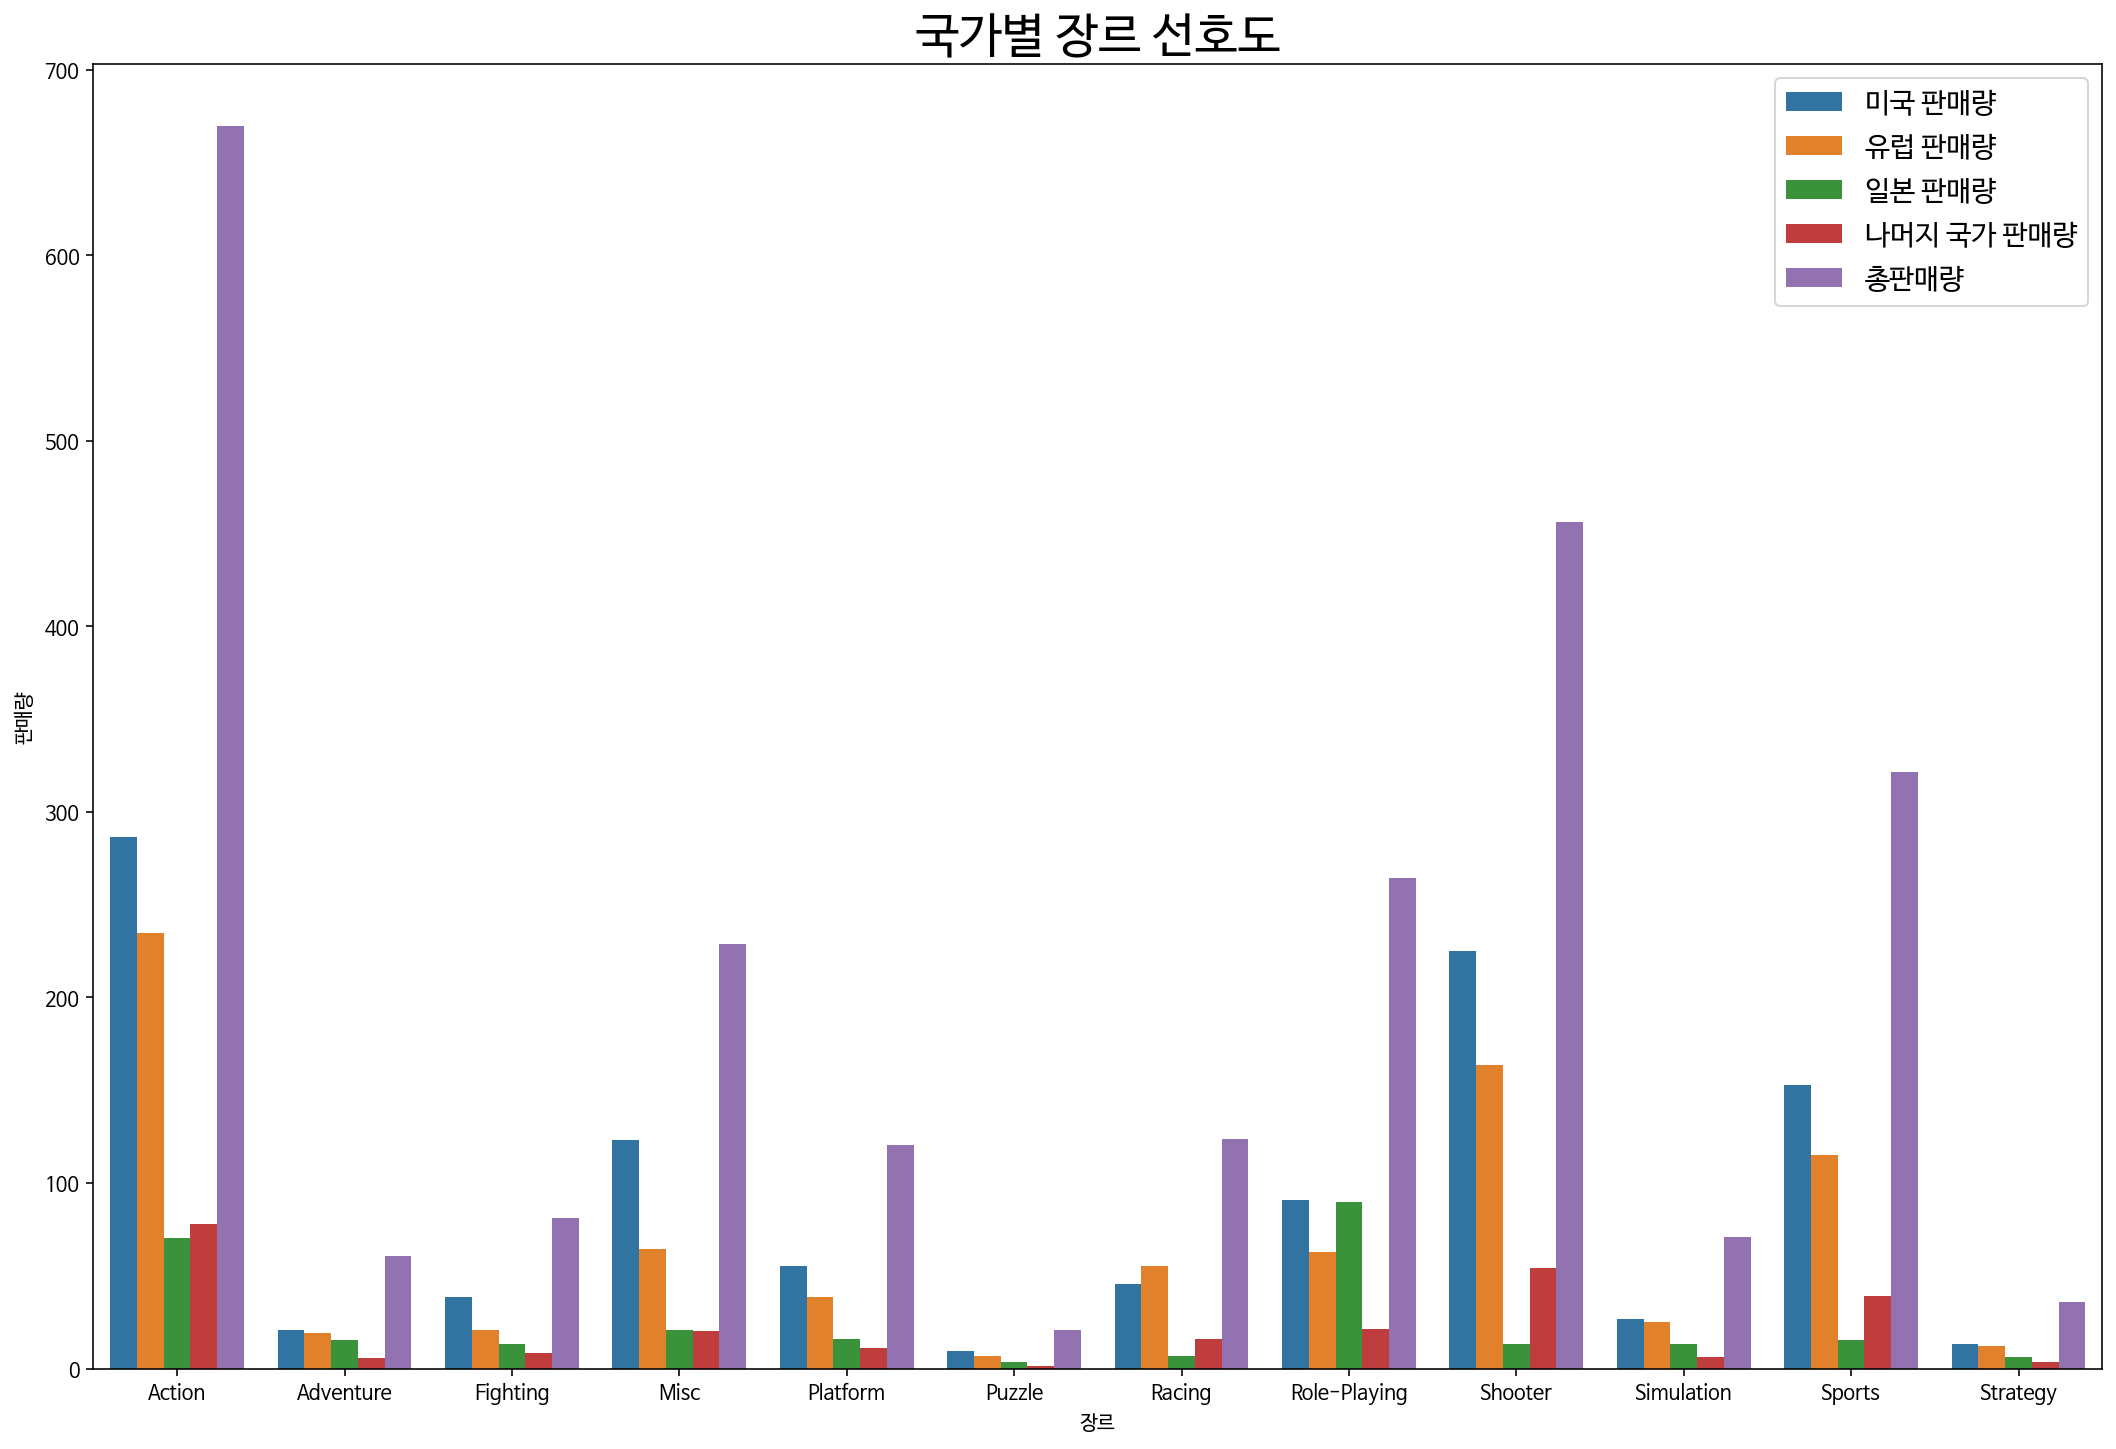

In [35]:
plt.figure(figsize=(18, 12))
sns.barplot(data=temp_melted, x='장르', y='판매량', hue='판매국가')
plt.title('국가별 장르 선호도', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

Action -> Shooter -> Sports 순서대로 선호도가 전개된다.

1-2. 장르 선호도 히트맵
--

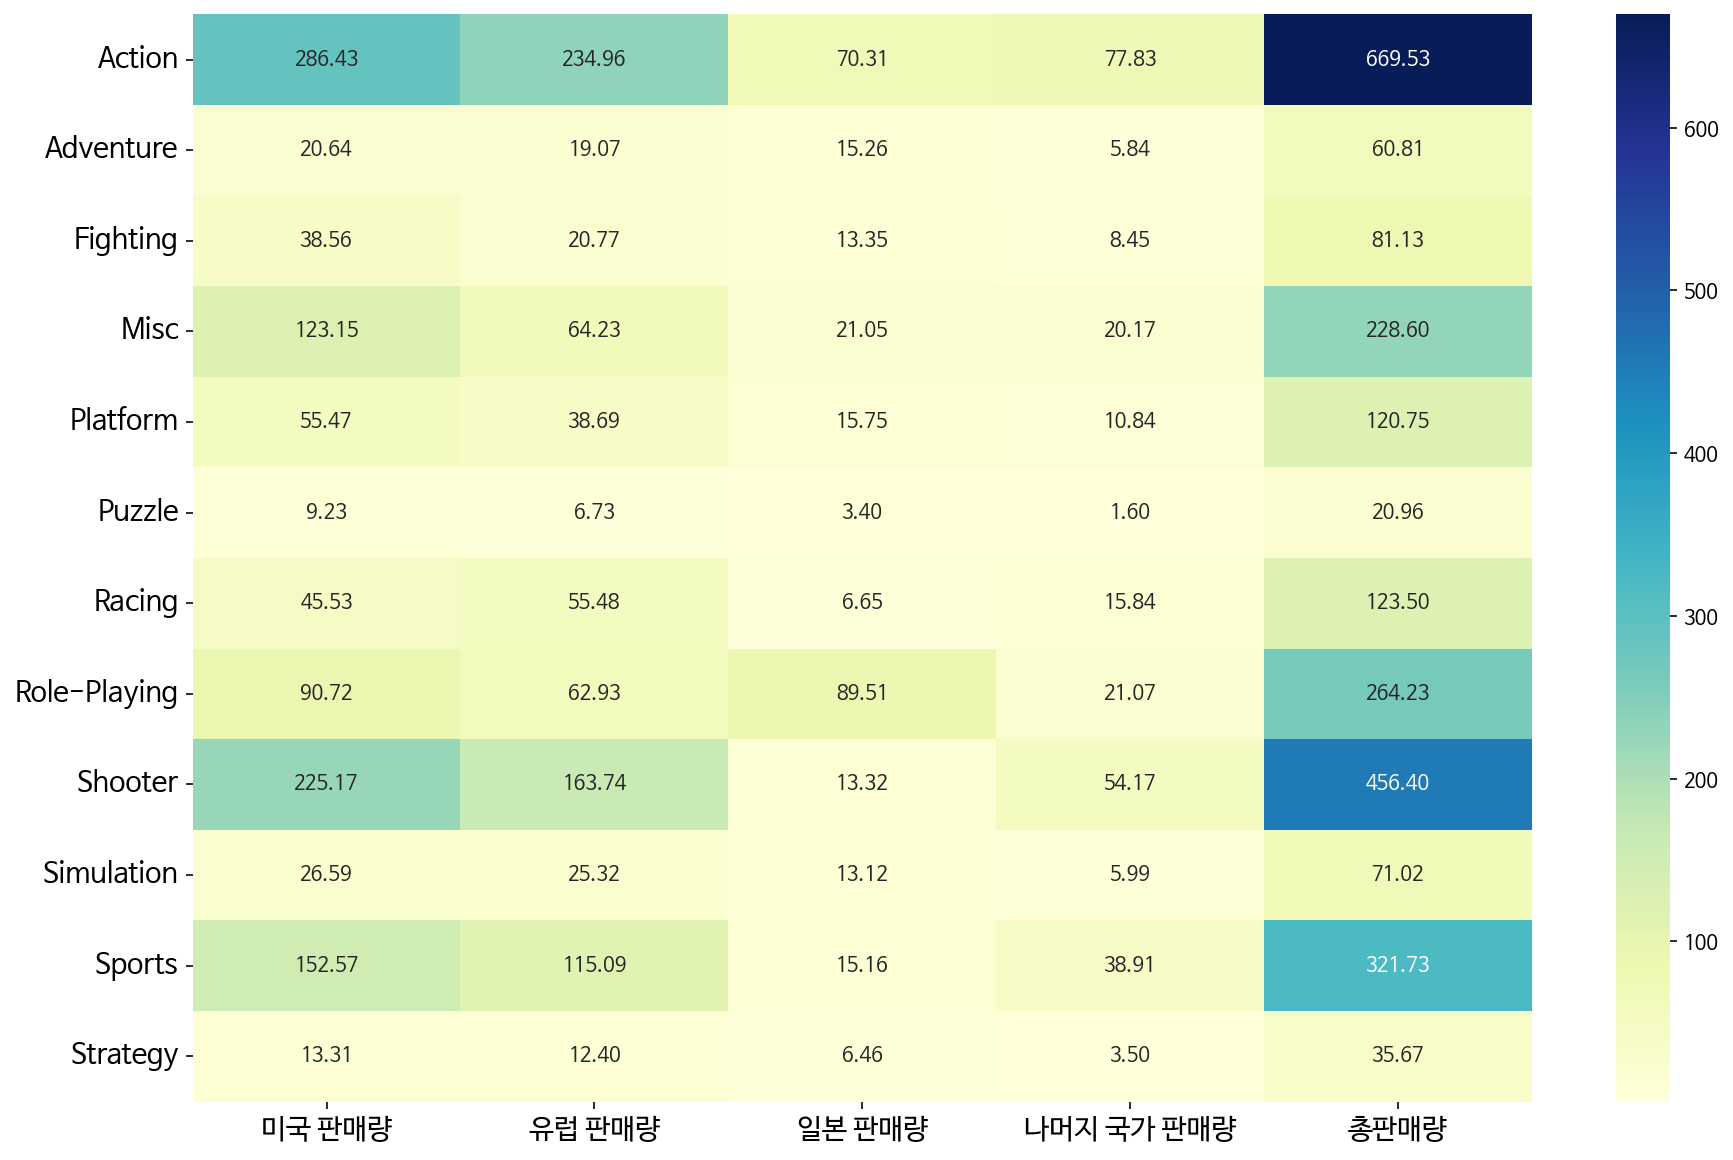

In [36]:
plt.figure(figsize=(15, 10))

a = sns.heatmap(temp_grouped, annot=True, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)
plt.show()

1-3 장르 선호도 국가별 TOP3 고르기
--

In [37]:
# top3 정의 내리기.
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['장르', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['장르', '판매량']
    return new_df

In [38]:
# Top3 데이터 저장
na_genre_top3 = top3_genre(temp_table, '미국 판매량')
eu_genre_top3 = top3_genre(temp_table, '유럽 판매량')
jp_genre_top3 = top3_genre(temp_table, '일본 판매량')
other_genre_top3 = top3_genre(temp_table, '나머지 국가 판매량')
total_genre_top3 = top3_genre(temp_table, '총판매량')

In [39]:
# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3, total_genre_top3]
columns_list = temp_table.columns[1:]

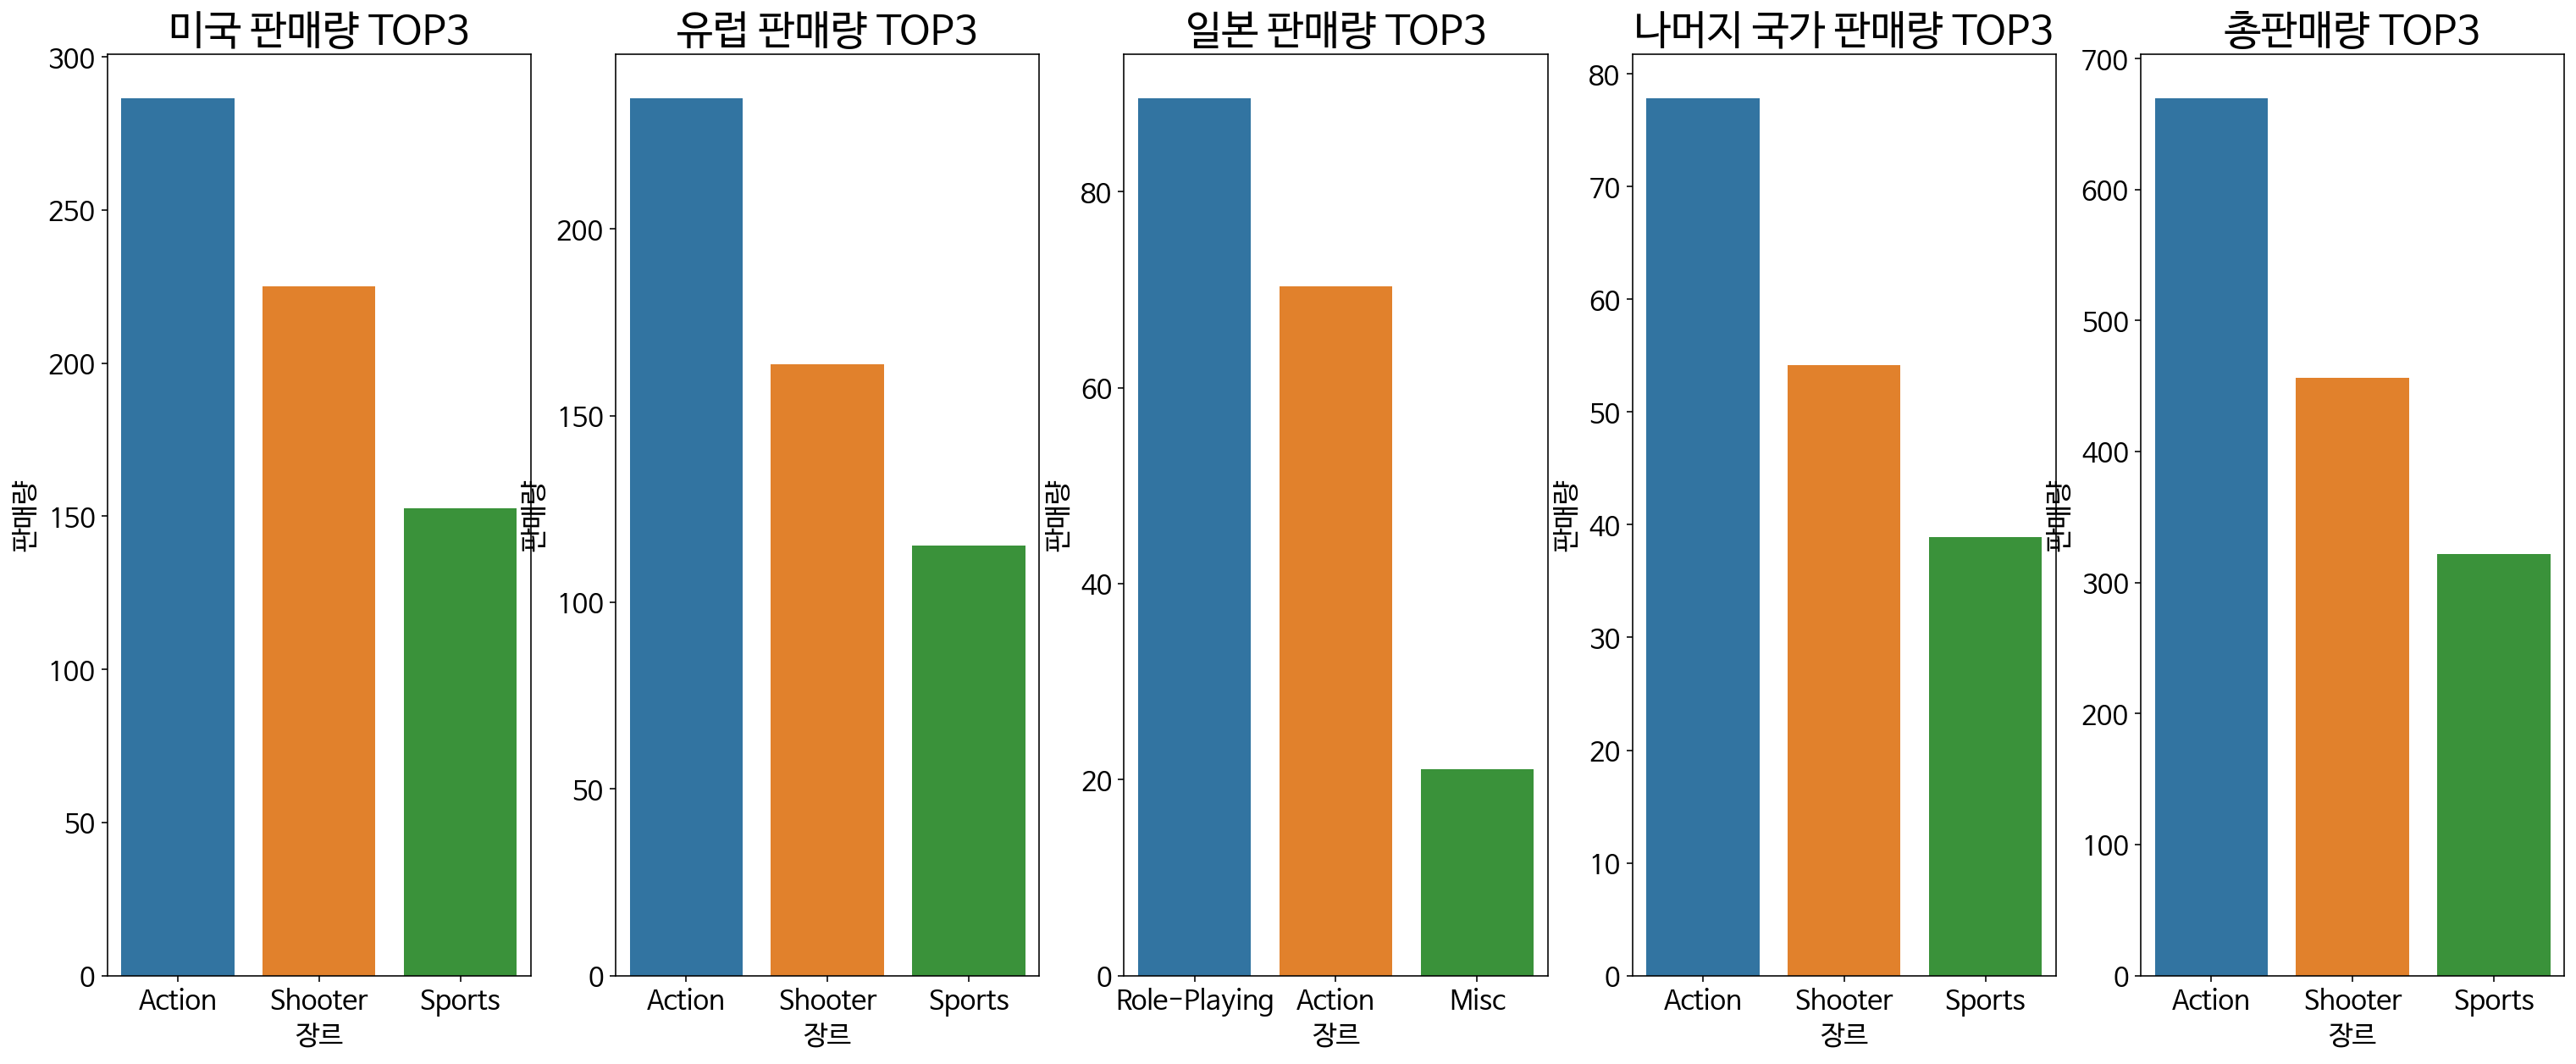

In [40]:
#그래프 출력하기기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=5)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='장르', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('장르', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

1-4. 연도별 게임 출고량의 따른 장르 트렌드
--

In [41]:
# 년도별 장르 갯수
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']

In [42]:
# 장르값 할당
genre = year_max_genre['장르'].values

In [ ]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Genre'])['Total_sales'].sum().reset_index()
condition = year_max_sales['Total_sales'] == year_max_sales.groupby(['Year'])['Total_sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales[:5]

In [48]:
# 스타일 변경
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

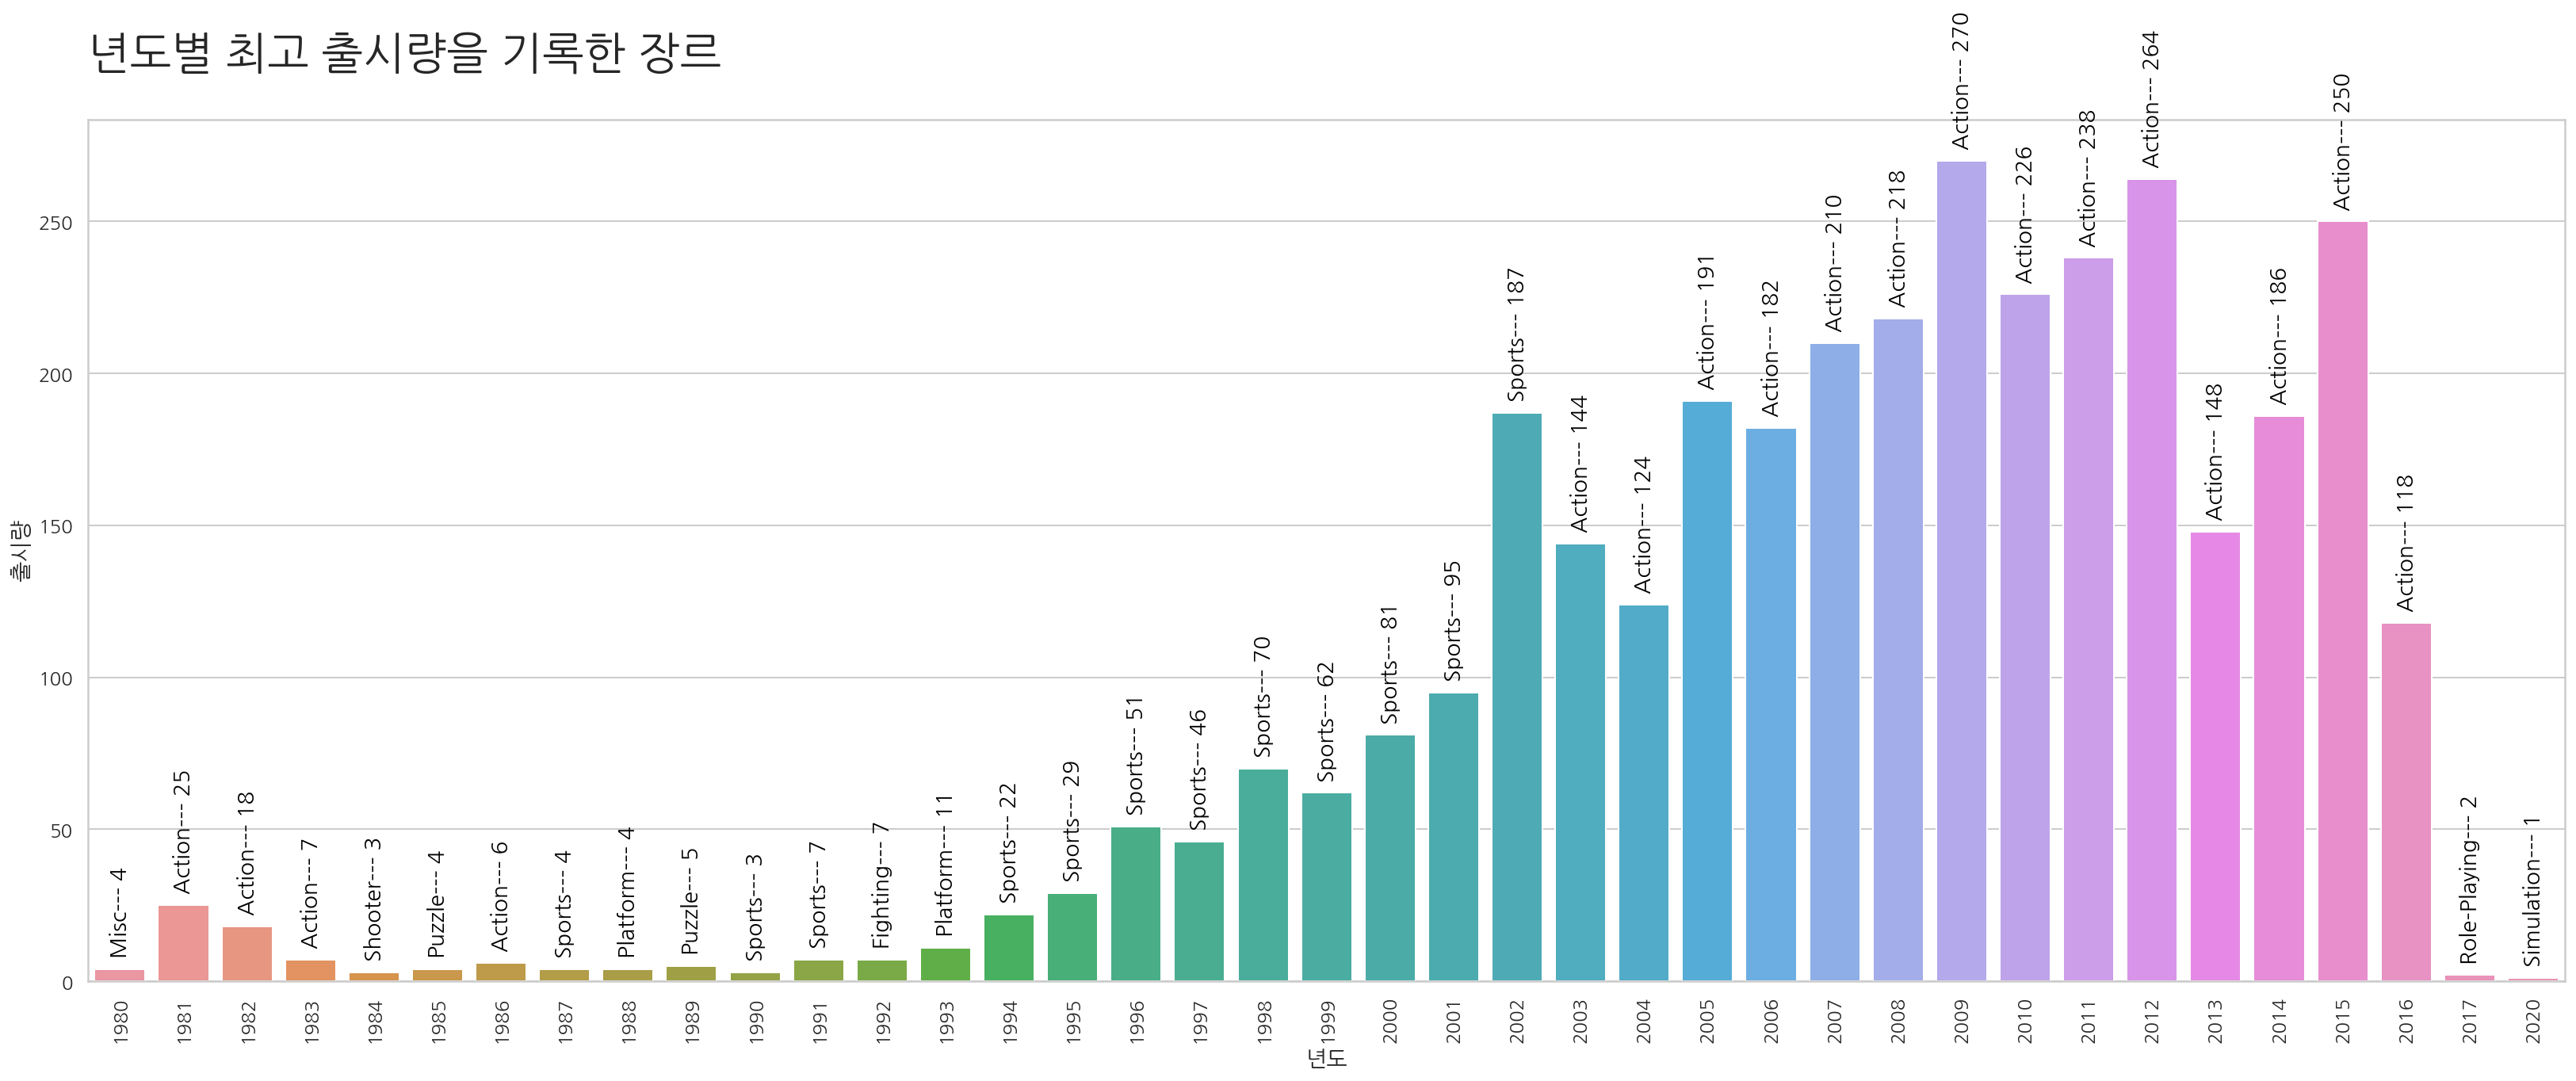

In [52]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 장르', fontsize=28, y=1.05, loc='left')
plt.show()

보다시피 상하위 5%를 뺀 값이어도 Action이 트렌드다.

---
플랫폼 분석
--

최근 트랜드를 파악하고 "다음 게임을 어떻게 할까?"에 대한 것이므로 2010년도 이후 데이터를 쓰기로 한다.

In [66]:
# 지역별 플랫폼 선호도 분석
pf_by_sales = df_2010[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pf_by_sales.columns = ['플랫폼', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
pf_by_sales_grouped = pf_by_sales.groupby(by=['플랫폼']).sum()
pf_by_sales_df = pf_by_sales_grouped.reset_index()
pf_by_sales_mt = pd.melt(pf_by_sales_df, id_vars=['플랫폼'], value_vars=pf_by_sales.columns[1:],
                         var_name='판매국가', value_name='판매량')

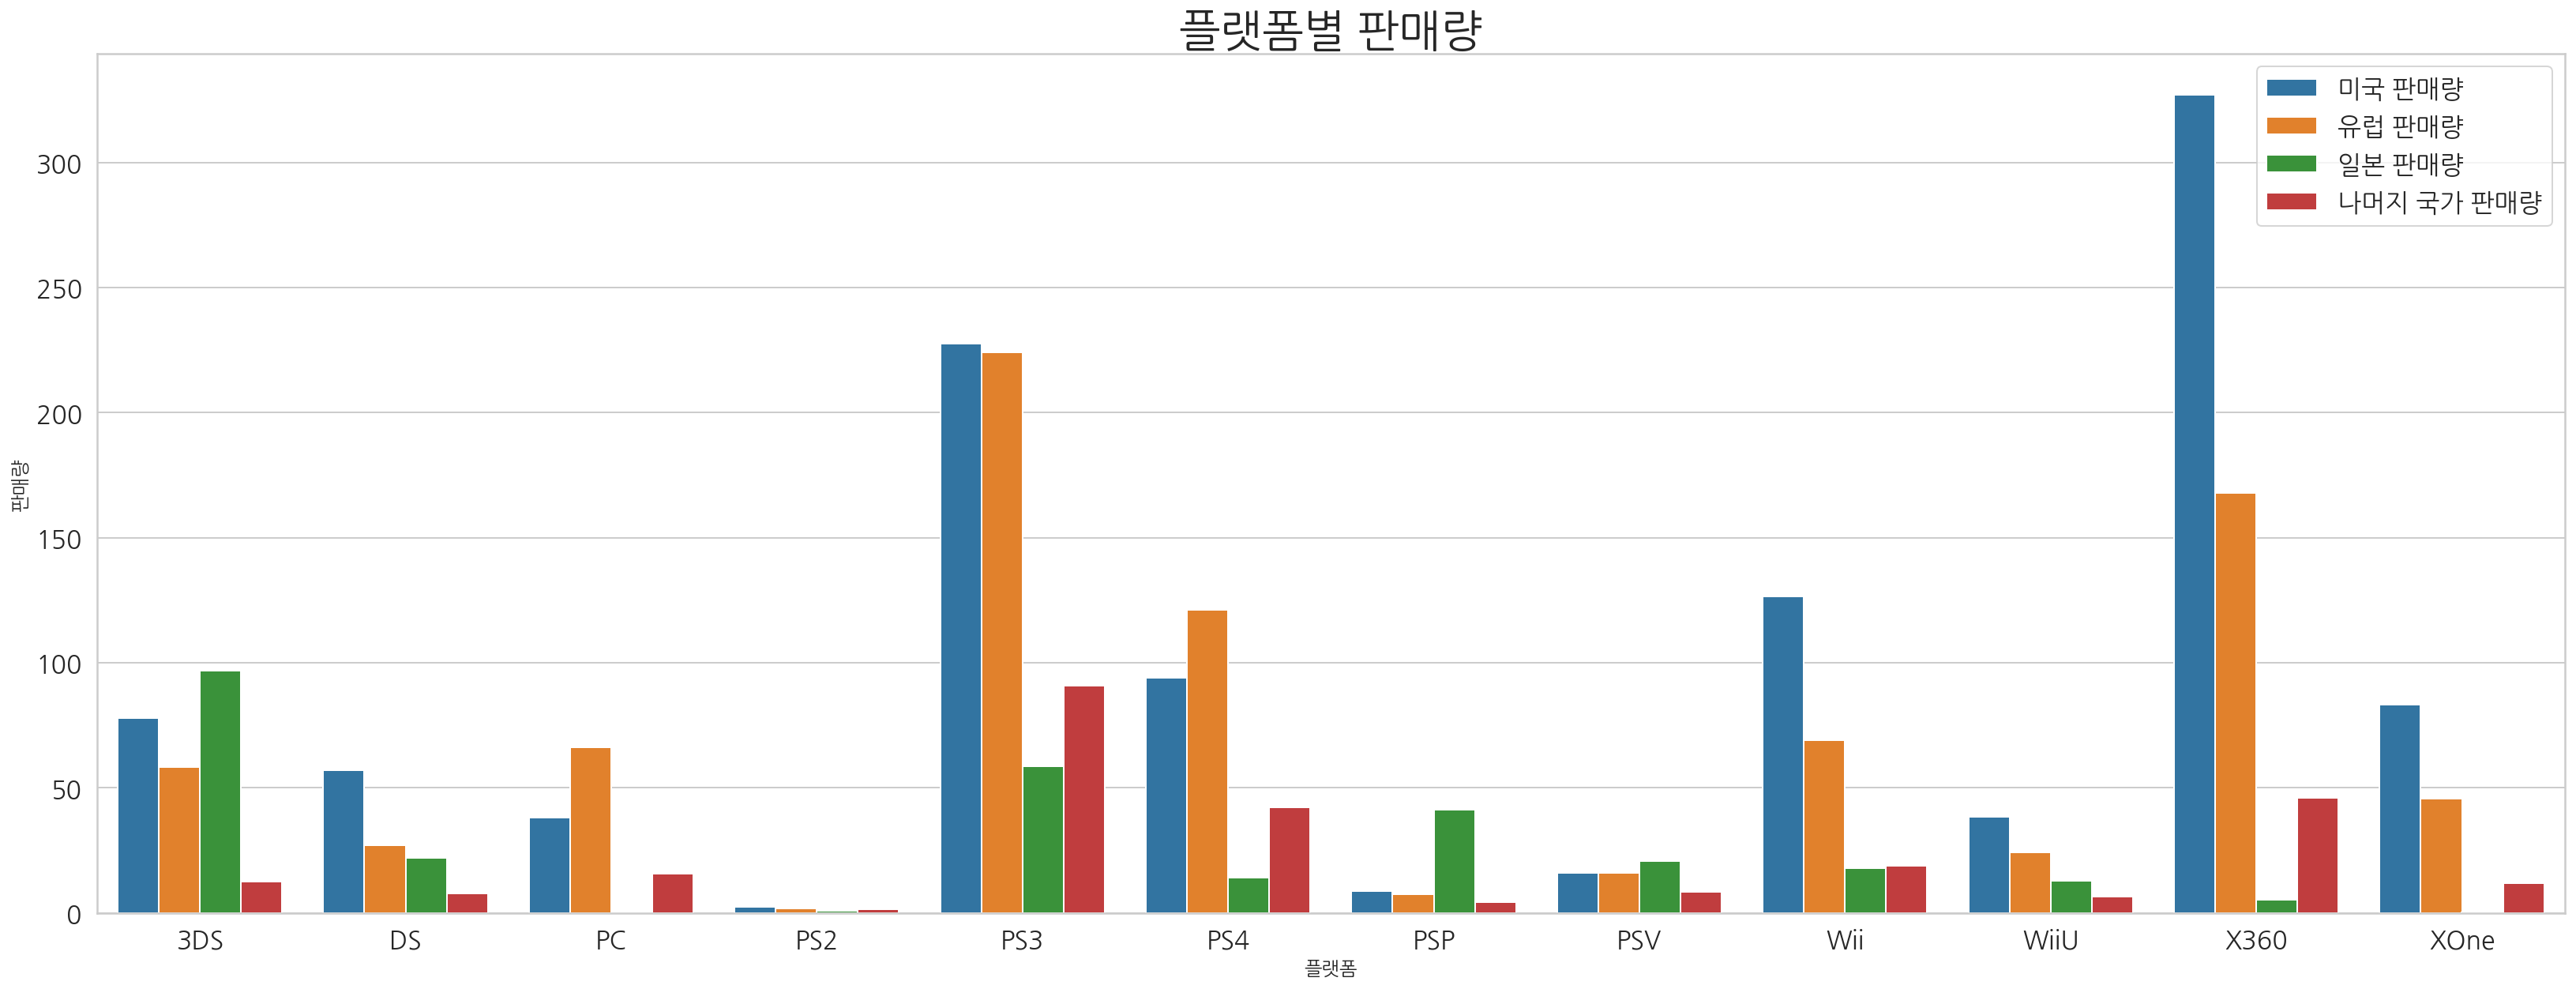

In [67]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='플랫폼', y='판매량', hue='판매국가', data=pf_by_sales_mt)
ax.set_title('플랫폼별 판매량', fontsize=28)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

(2010년 이후 기준)당장은 PS가 전체적으로 선호도가 있는 편이며, Nintendo의 Wii, Ds 그리고 XBox는 x360 모델이 인기 있었다.

2-1 플랫폼별 판매량 TOP3
--

In [68]:
def top3_platform(df, sales_col):
    new_df = df.loc[:, ['플랫폼', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['플랫폼', '판매량']
    return new_df
na_platform_t3 = top3_platform(pf_by_sales_df, '미국 판매량')
eu_platform_t3 = top3_platform(pf_by_sales_df, '유럽 판매량')
jp_platform_t3 = top3_platform(pf_by_sales_df, '일본 판매량')
other_platform_t3 = top3_platform(pf_by_sales_df, '나머지 국가 판매량')

In [69]:
# 데이터 리스트에 담기
data_list = [na_platform_t3, eu_platform_t3, jp_platform_t3, other_platform_t3]
columns_list = pf_by_sales.columns[1:]

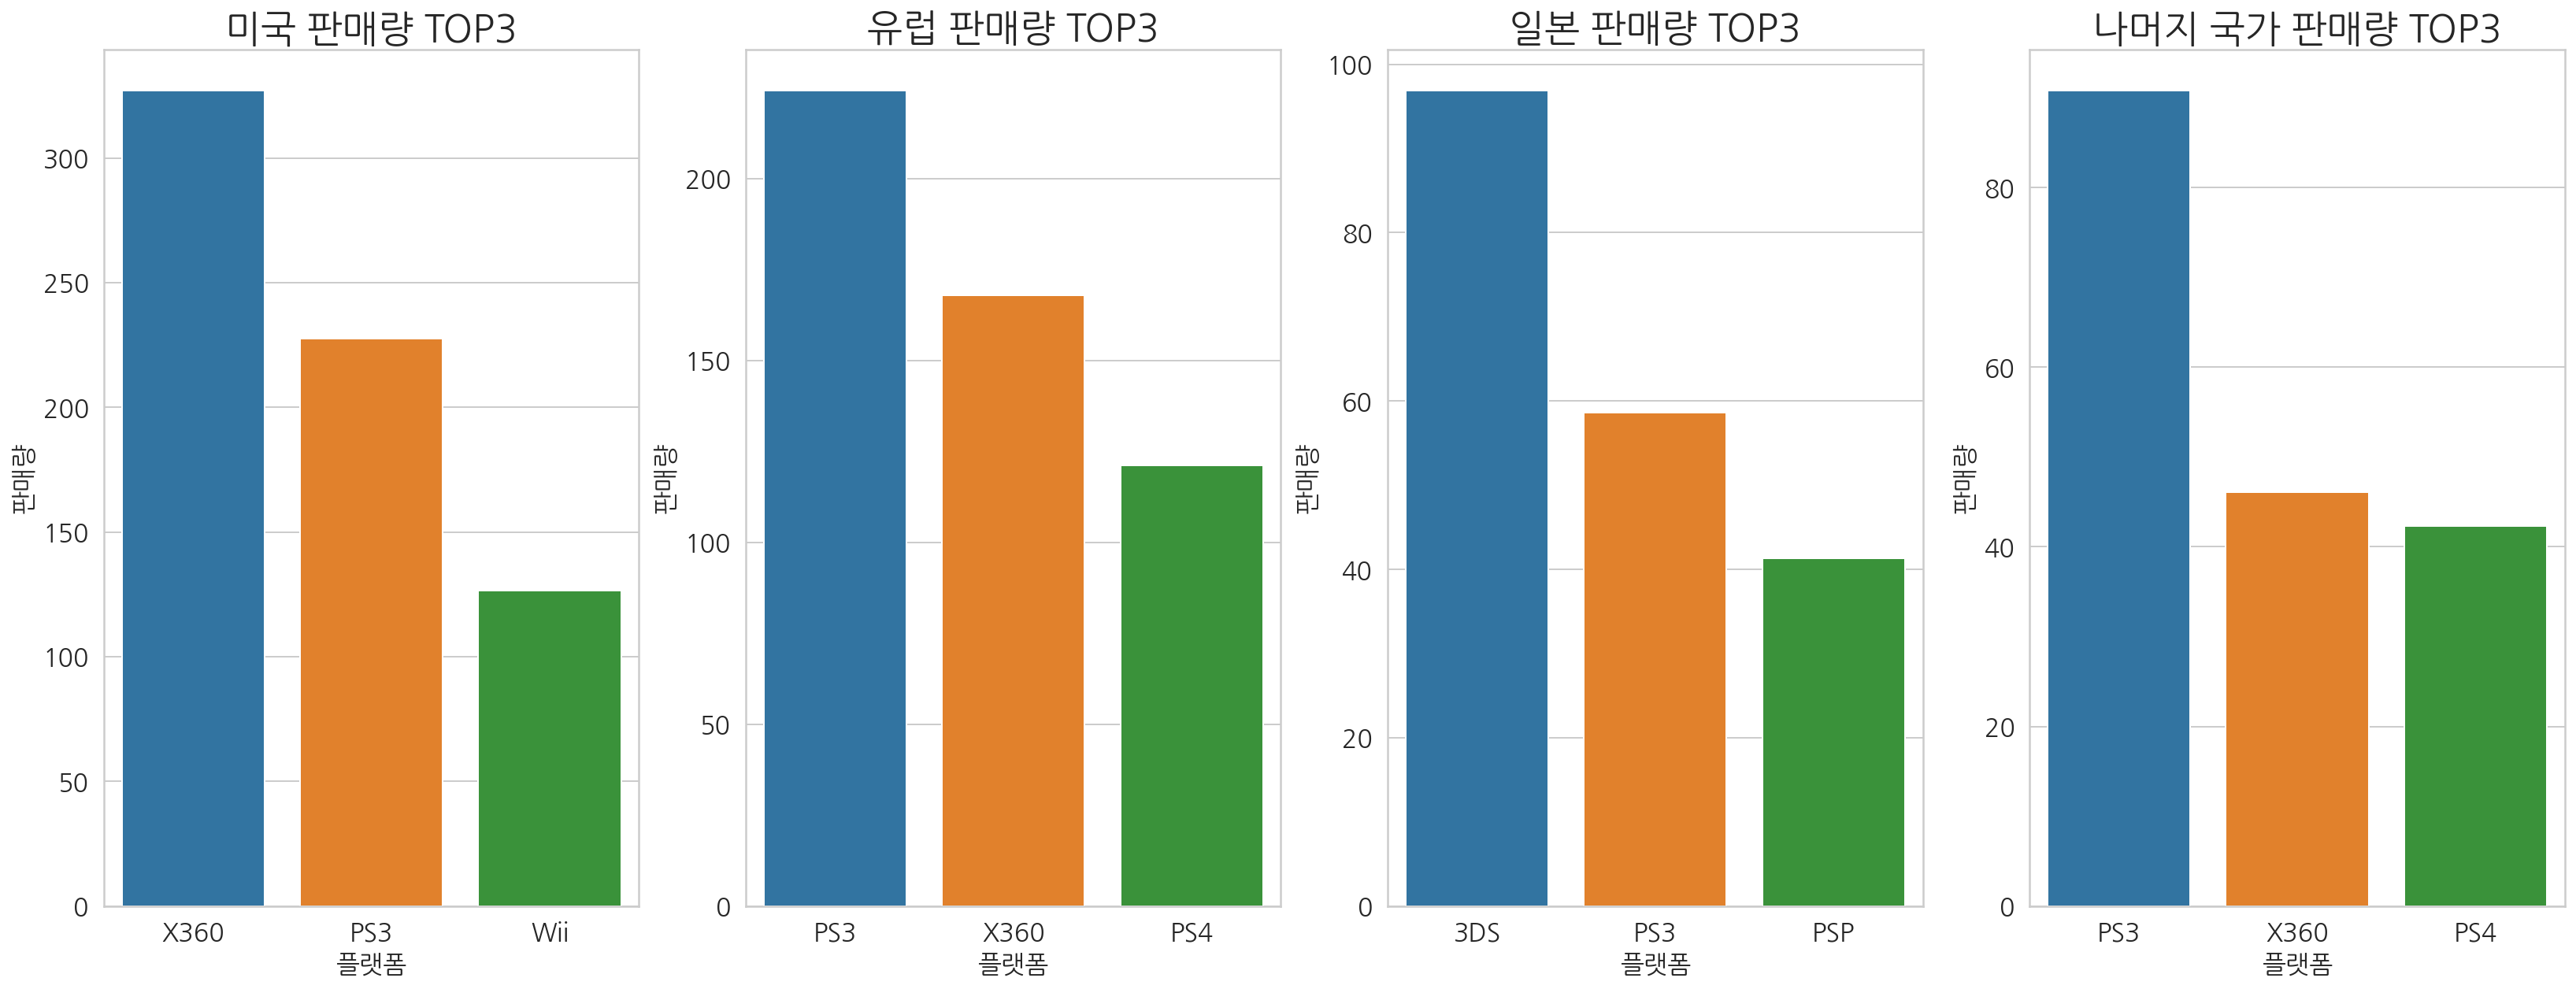

In [70]:
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(28, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='플랫폼', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(labelsize=16)
    axs[i].set_xlabel('플랫폼', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
    
plt.show()

국가별로 차이가 났으며, 미국은 x360, 유럽은 PS3, 일본은 3DS, 나머지 국가는 PS3가 우세했다.

2-2 년도별 최고 판매량을 기록했던 플랫폼
--

In [71]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Platform'])['Total_sales'].sum().reset_index()
condition = year_max_sales['Total_sales'] == year_max_sales.groupby(['Year'])['Total_sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '플랫폼', '전세계 판매량']
year_max_sales[:5]

,년도,플랫폼,전세계 판매량
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
4,1983,NES,10.96
6,1984,NES,50.08


In [72]:
# 플랫폼 값 저장
platform = year_max_sales['플랫폼'].values

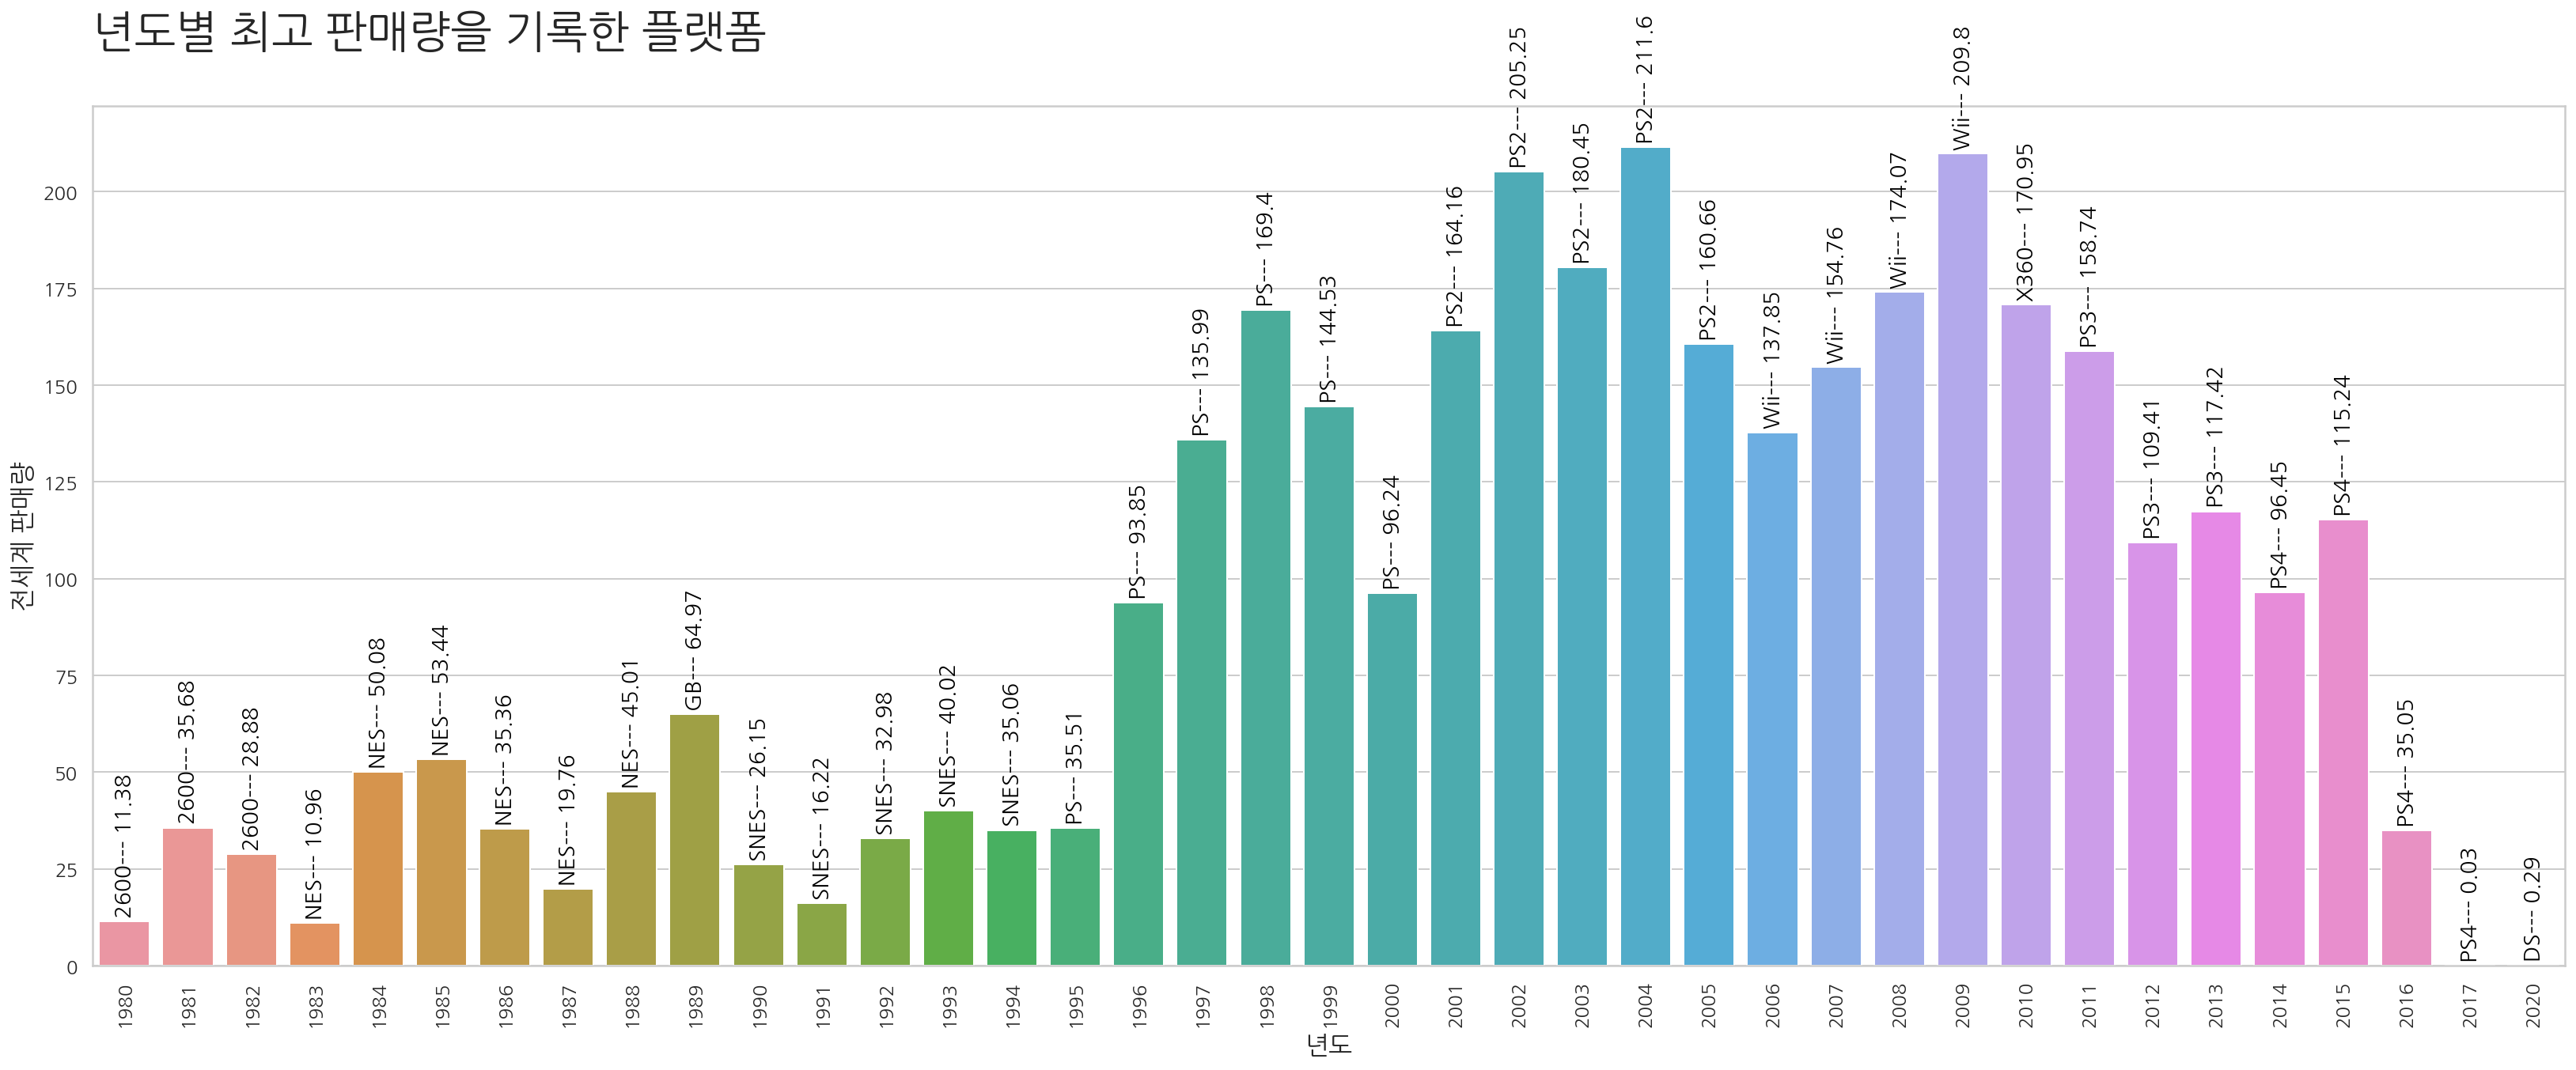

In [73]:
#그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(platform[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 플랫폼', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

---
게임회사 분석
--

3-1. 게임회사별 판매량 분석
--

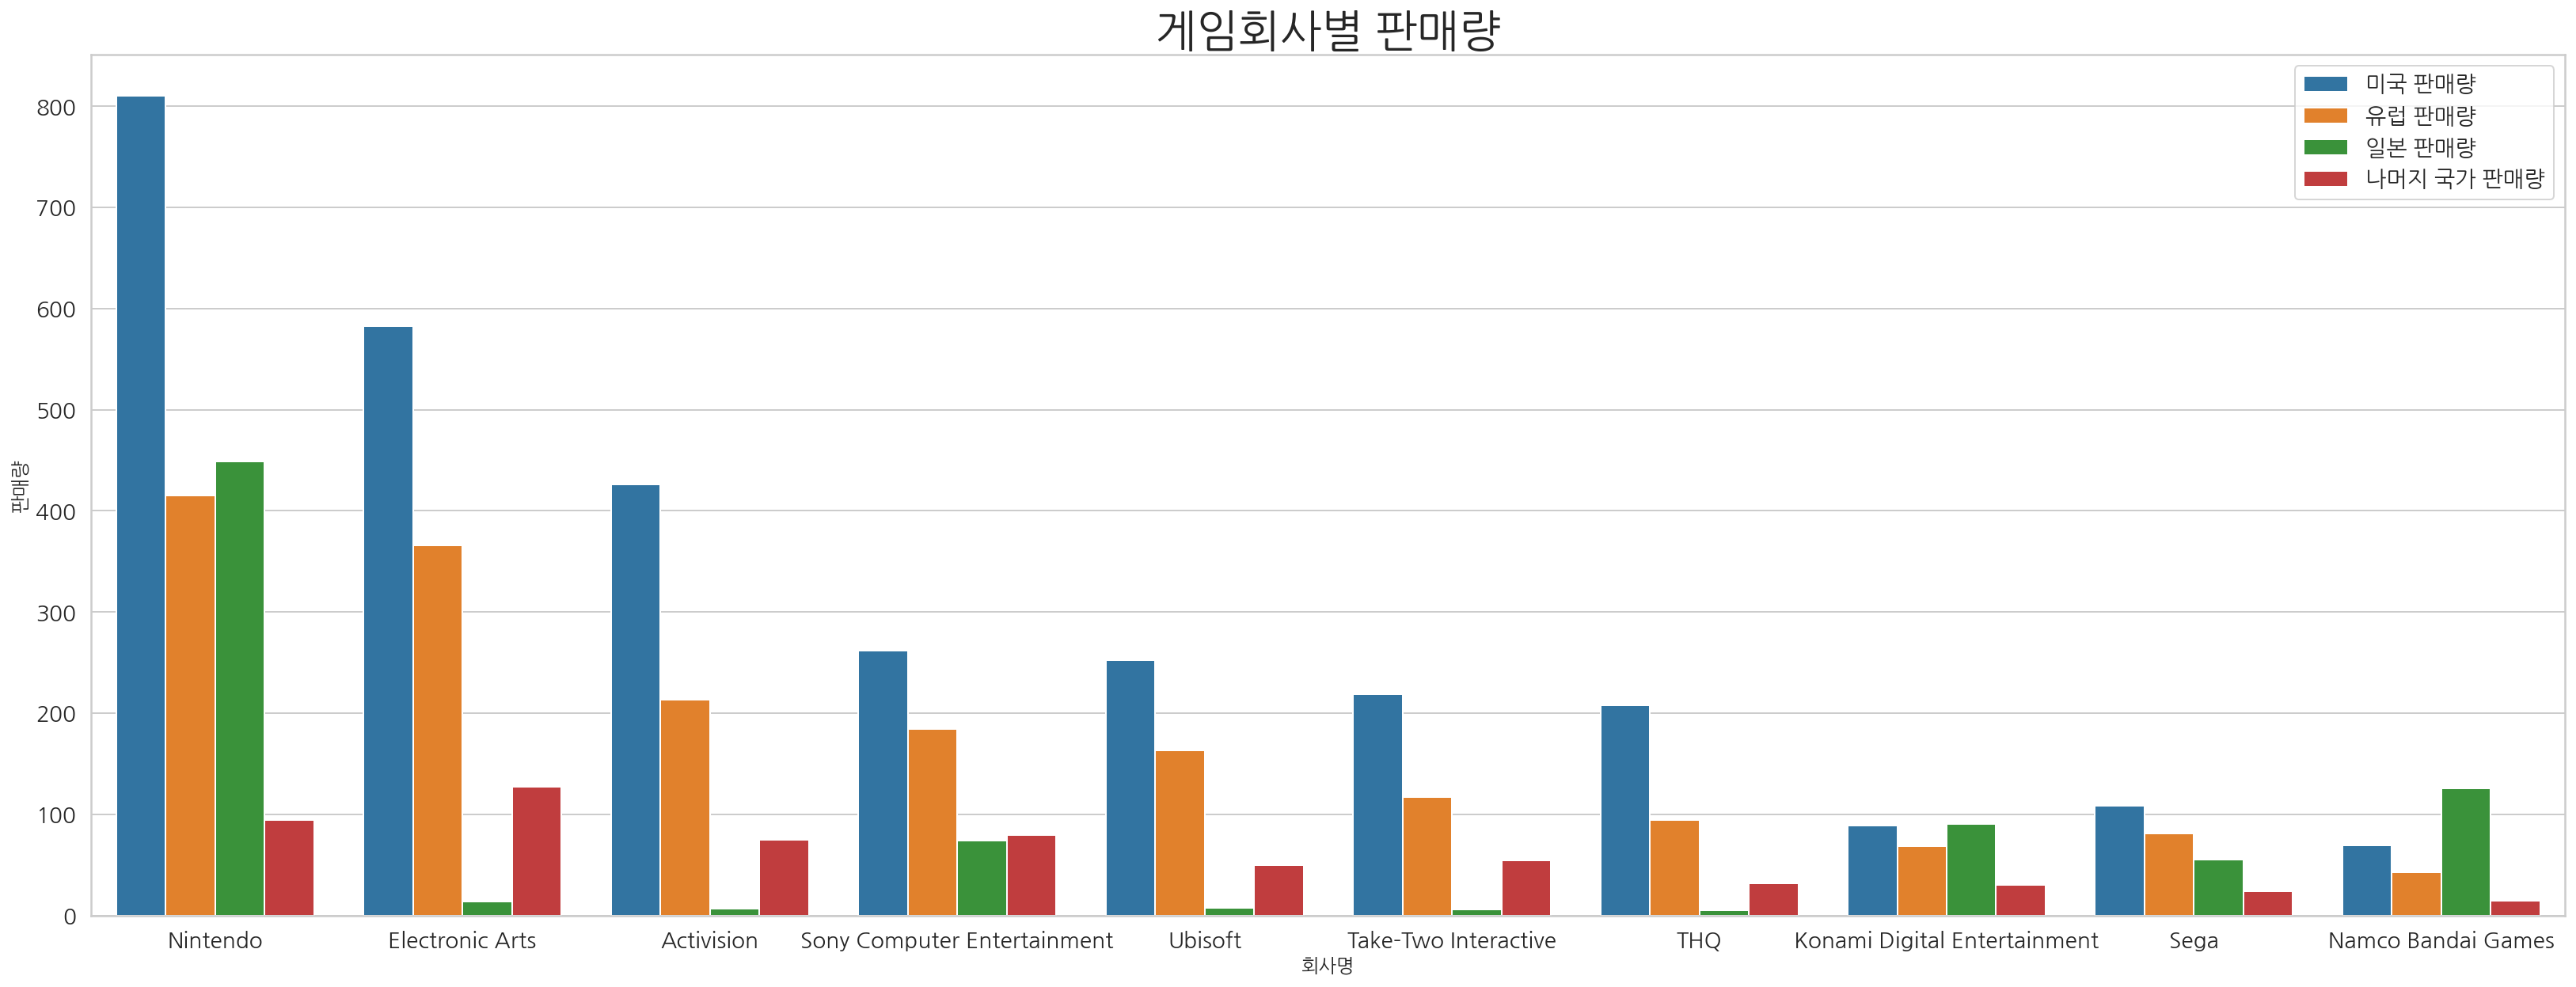

In [76]:
# 게임 회사별 판매량 막대 그래프
publisher_by_sales = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_sales']]
publisher_by_sales.columns = ['회사명', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량', '전세계 판매량']

publisher_by_sales_grouped = publisher_by_sales.groupby(by=['회사명']).sum()

publisher_by_sales_df = publisher_by_sales_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(10)
publisher_by_sales_mt = pd.melt(publisher_by_sales_df, id_vars=['회사명'], value_vars=publisher_by_sales.columns[1:-1],
                         var_name='판매국가', value_name='판매량')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='회사명', y='판매량', hue='판매국가', data=publisher_by_sales_mt)
ax.set_title('게임회사별 판매량', fontsize=28)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show() 

대부분의 국가들은 큰 상관없이 회사 선호도를 보여준다.

다만, 일본은 이상할 정도로 닌텐도, 반다이 남코, 코나미, 세가, 소니 정도만 편애할 정도로 자국 회사에 선호도가 드러난다.

3-2. 년도별 최고 판매량을 기록한 회사
--

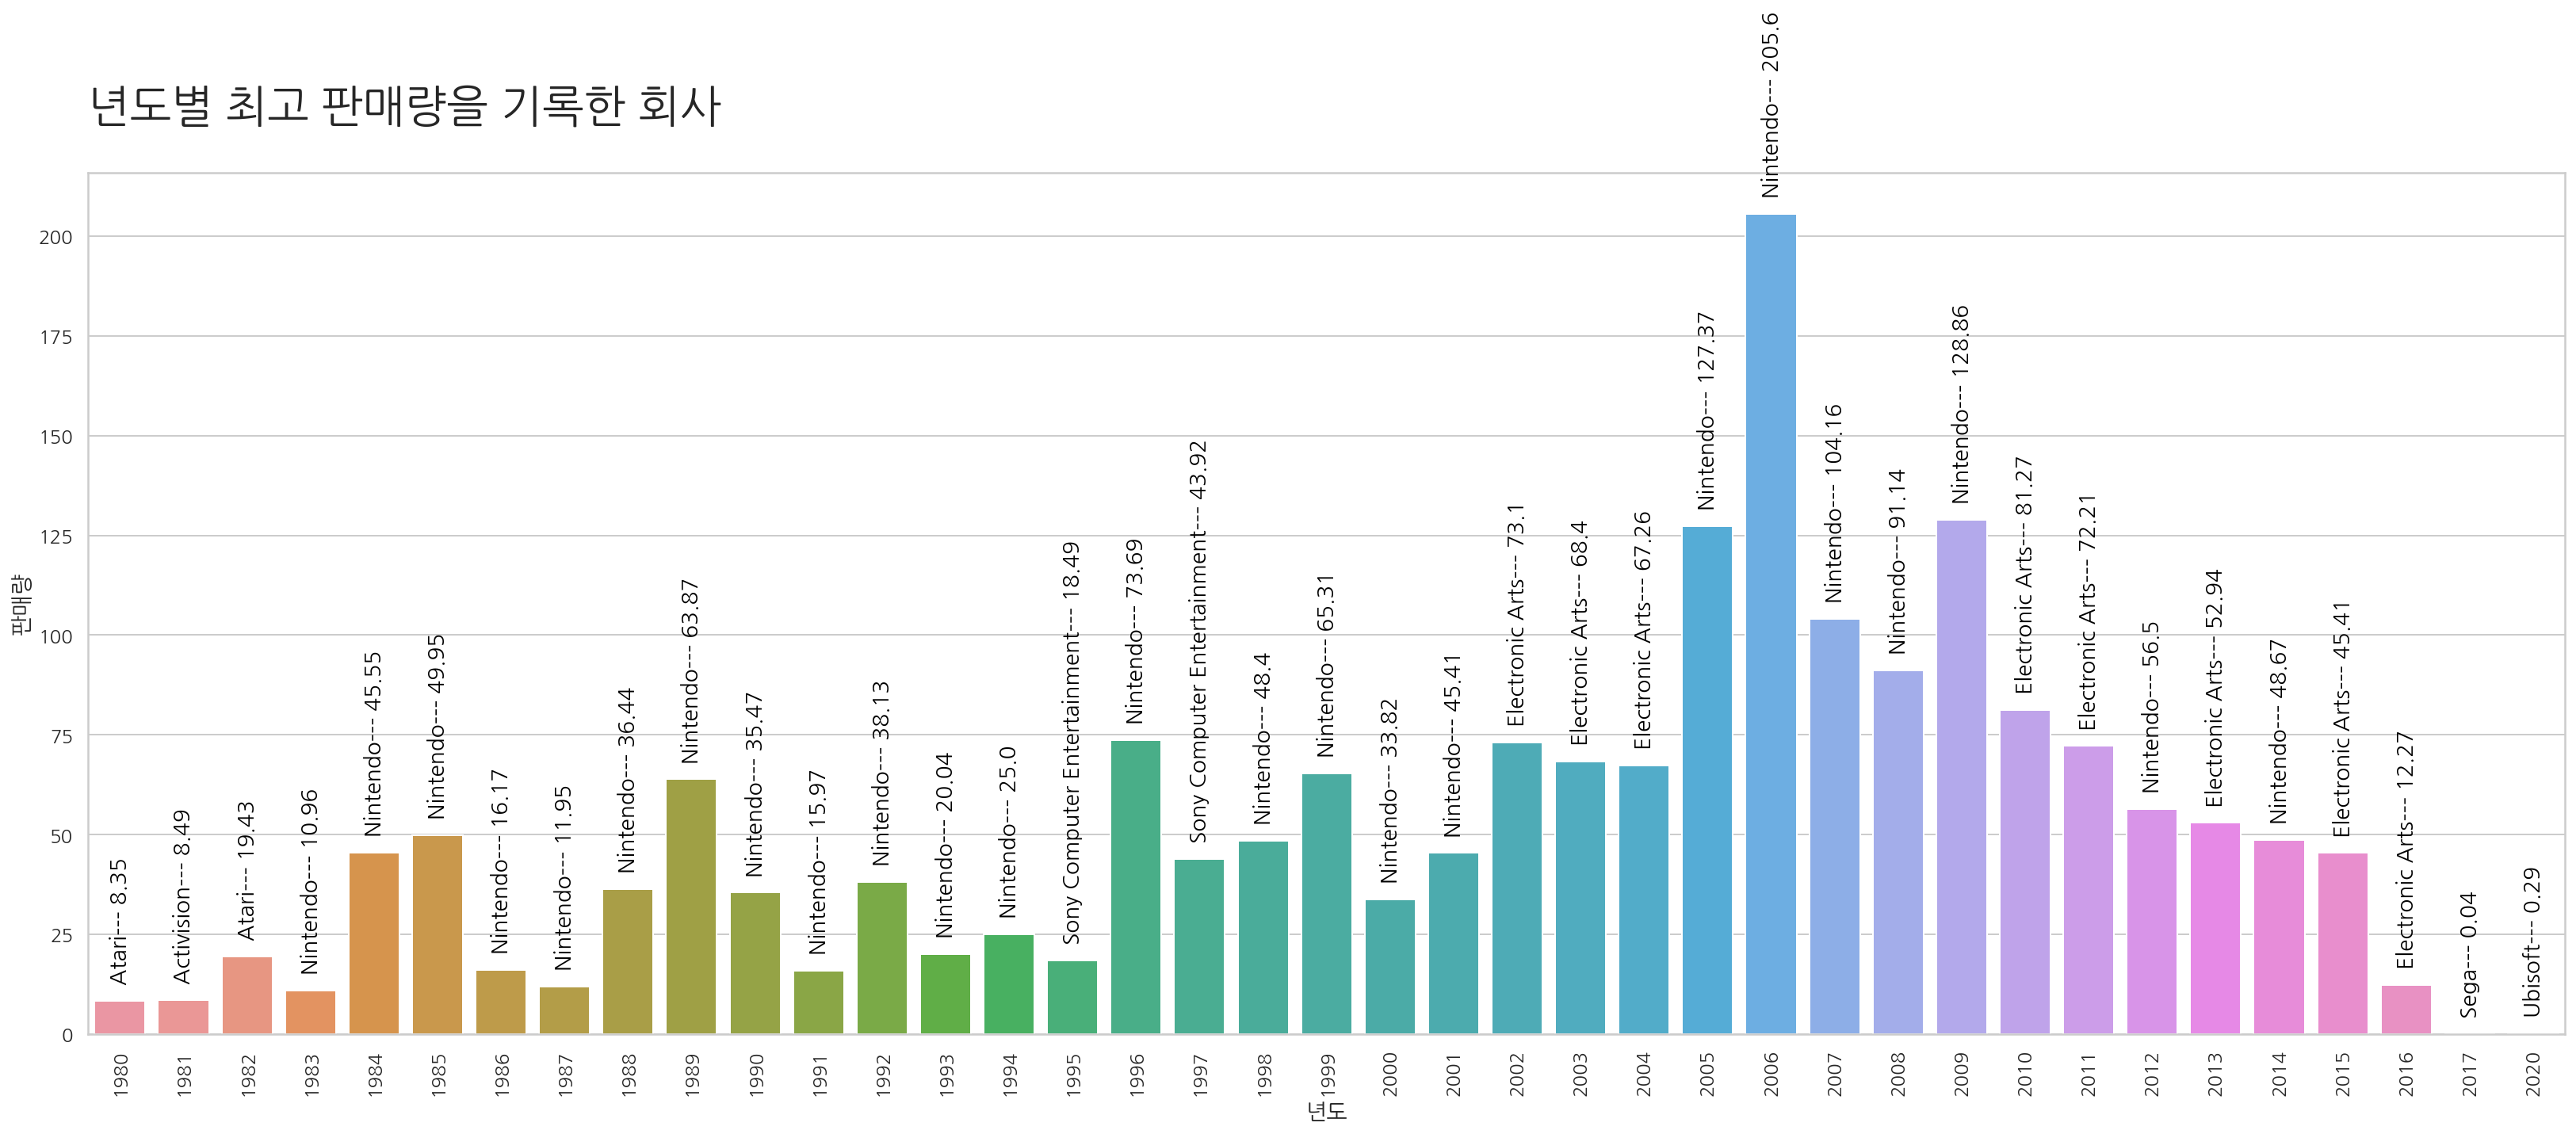

In [78]:
# 회사의 년도별 판매량 데이터 프레임 만들기
year_sales_com = df.groupby(['Year', 'Publisher'])['Total_sales'].sum().reset_index(name='sales')
condition = year_sales_com['sales'] == year_sales_com.groupby(['Year'])['sales'].transform(max)
year_sales_com = year_sales_com[condition]

# 중복값 마지막값이외에 제외하기
year_sales_com = year_sales_com.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_com.columns = ['년도', '회사명', '판매량']

publisher = year_sales_com.회사명


plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='판매량', data=year_sales_com)
idx = 0
for value in year_sales_com['판매량']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('판매량', fontsize=14)
ax.set_title('년도별 최고 판매량을 기록한 회사', fontsize=28, y=1.05, loc='left')
plt.show()

닌텐도가 년간 판매량을 계속해서 가저가나, 2000년도에 들어서 EA와 순위를 엎치락 뒤치락하는 것처럼 보인다.

---
### Top 10 게임 분석

4-1. 역대 판매량이 높았던 게임
--

In [80]:
# 판매량이 높은 Top10
sales_top10 = df.loc[df.Total_sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1 위
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2 위
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3 위
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4 위
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5 위
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6 위
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7 위
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8 위
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9 위
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10 위


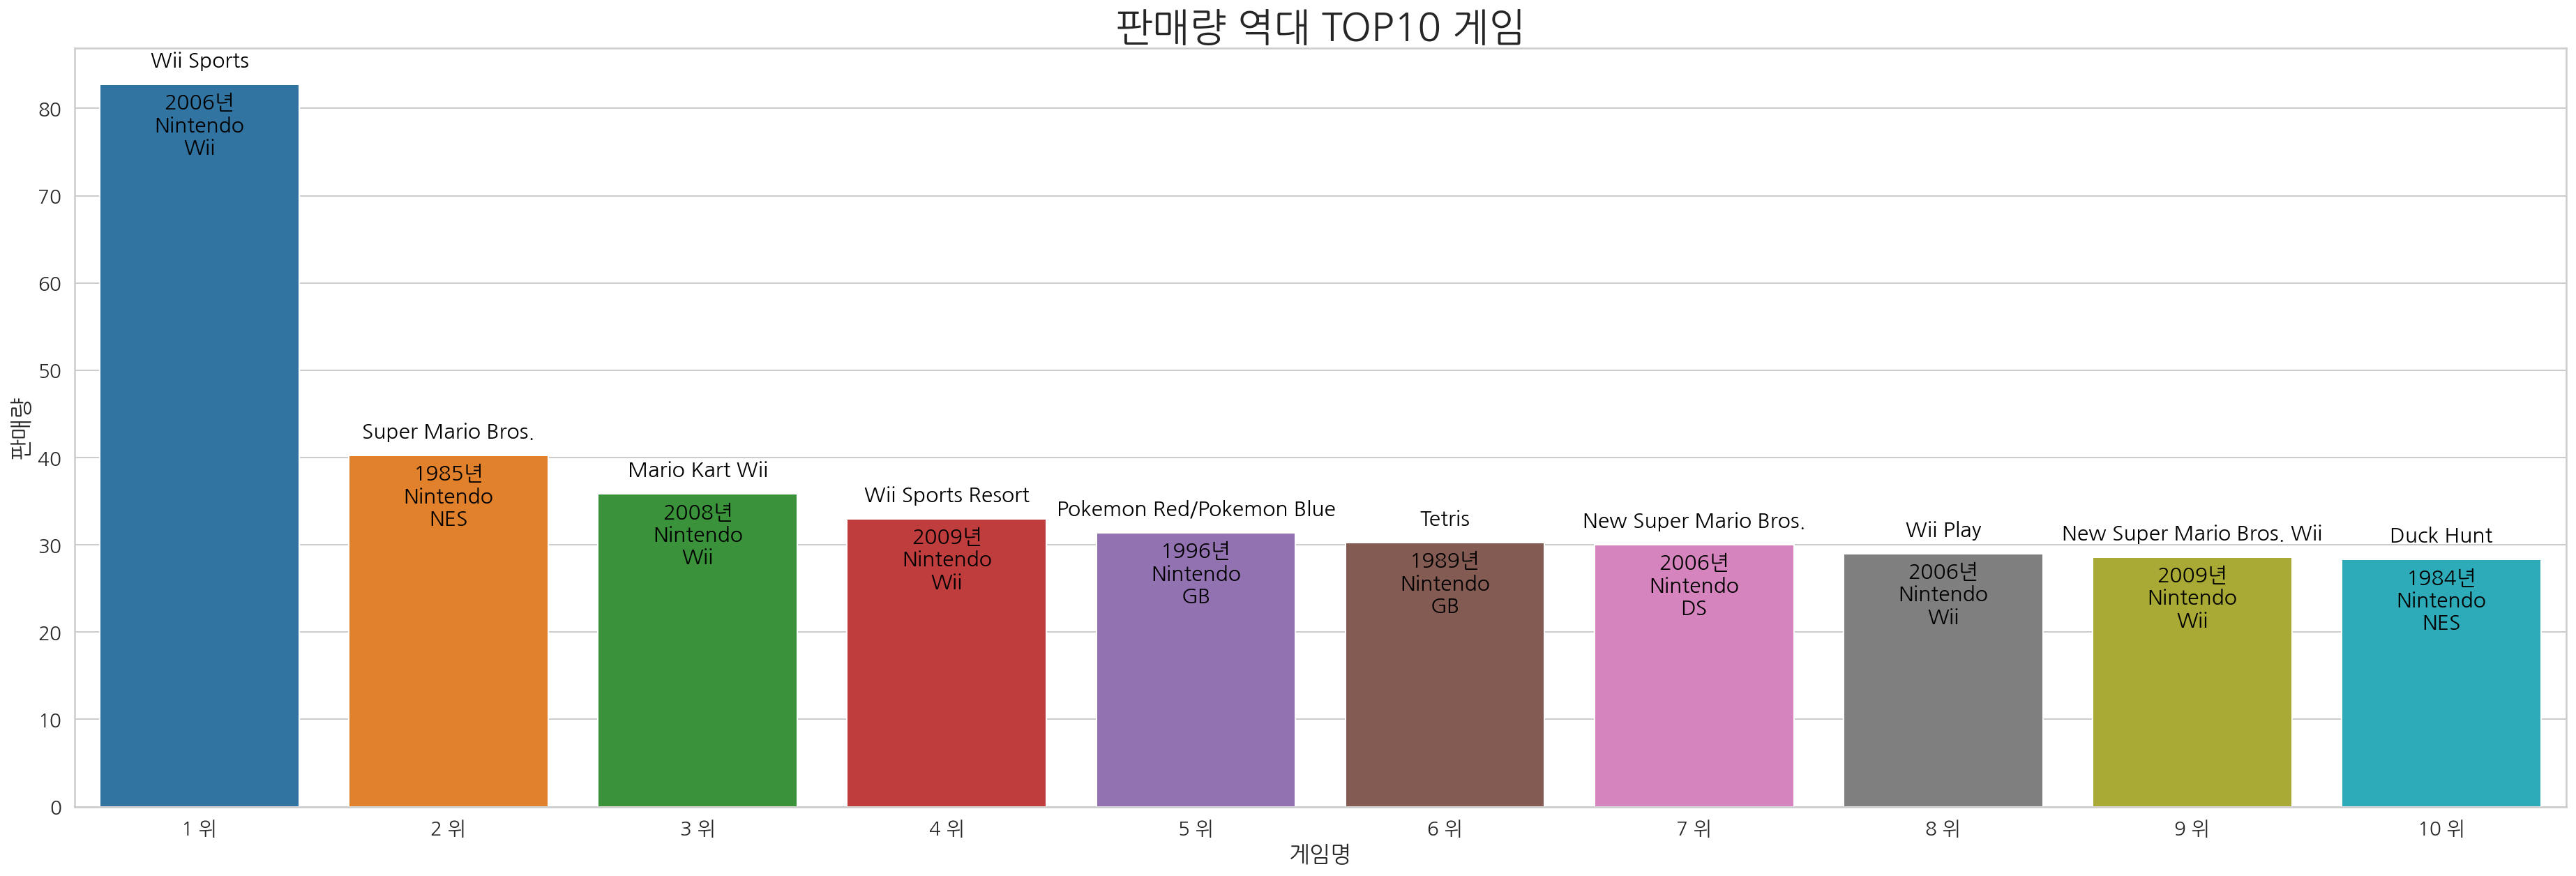

In [82]:
plt.figure(figsize=(32,10))
a = sns.barplot(x='rank', y='Total_sales', data=sales_top10)
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Total_sales, 
                                                sales_top10.Platform, sales_top10.Publisher):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=15)
    a.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
a.set_title('판매량 역대 TOP10 게임', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('게임명', fontsize=16)
plt.ylabel('판매량', fontsize=16)
plt.show()

닌텐도가 지속적으로 자리를 지키고 있으며, 모든 순위를 독점할 정도다. WIi부터 NES까지 시대를 아우르고 있다.

4-2. 2010년 이후 판매량 순위
--

In [94]:
df_2011 = df_2010[df.Year >= 2011].sort_values('Total_sales', ascending=False)
df_2011_top10 = df_2011.head(10)

df_2011_top10  = df_2011_top10.reset_index(drop=True)

df_2011_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
5,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
8,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


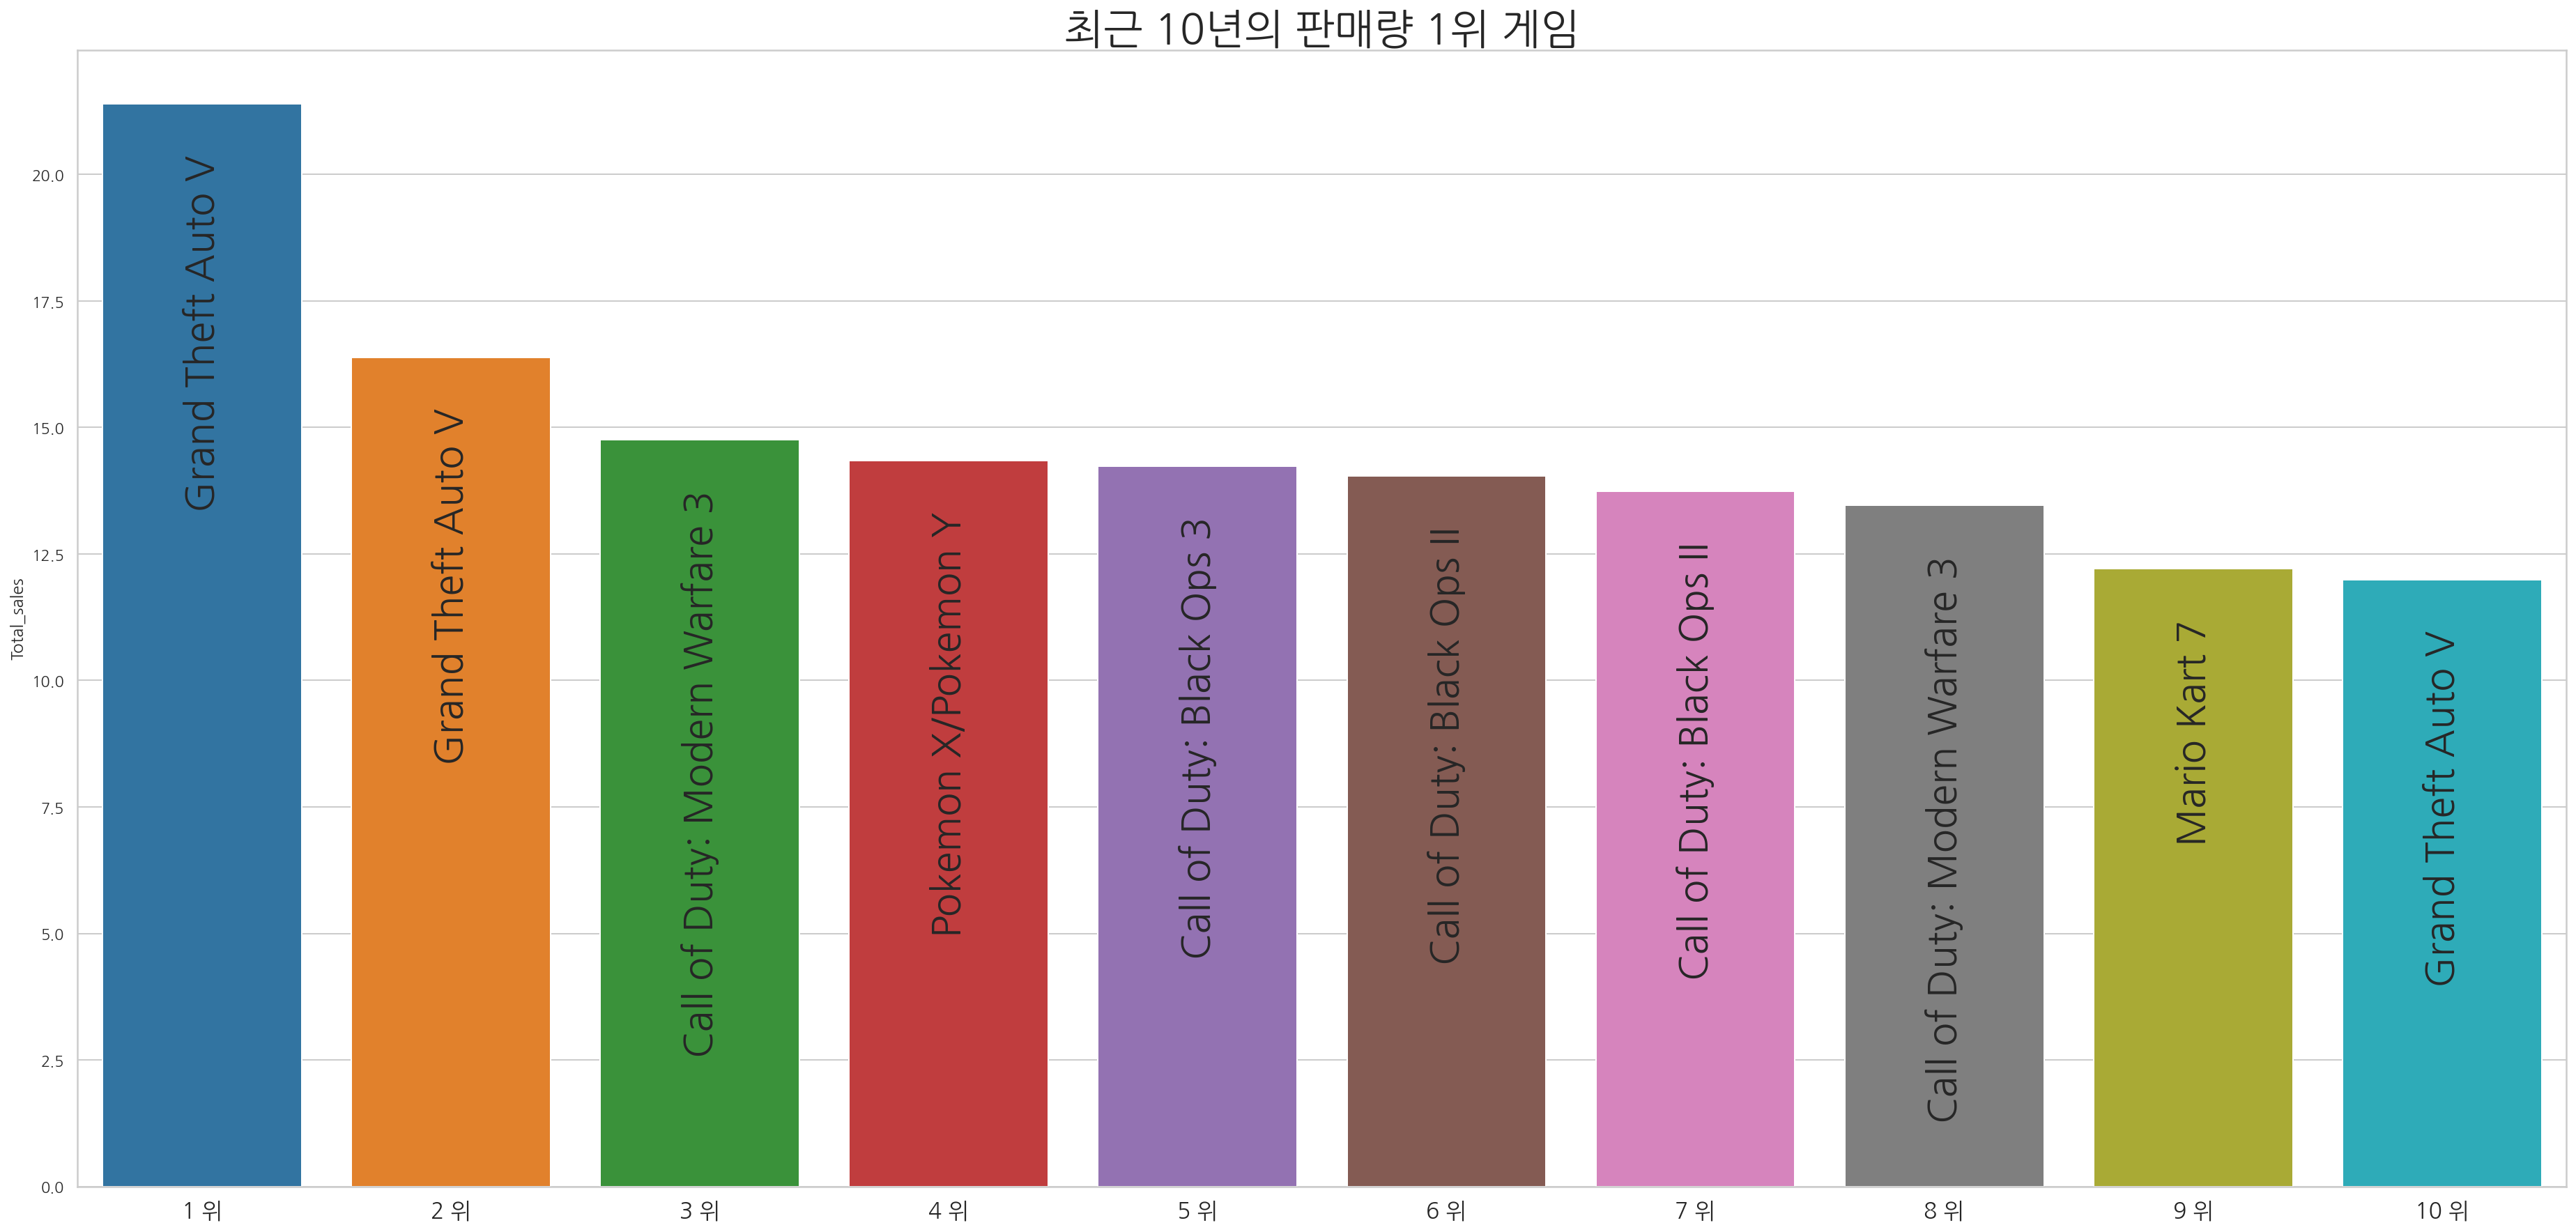

In [95]:
plt.figure(figsize=(32, 15))
a = sns.barplot(x = df_2011_top10.index, y='Total_sales', data=df_2011_top10)
i = 0
for name, val in zip(df_2011_top10.Name, df_2011_top10.Total_sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=28, rotation=90)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=28, rotation=90)
    
    i+=1
a.set_title('최근 10년의 판매량 1위 게임', fontsize=30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x)+' 위' for x in range(1, 11)], fontsize=16)
plt.show()

모든 공통점이라 하면 모두 시리즈 게임이다. 닌텐도가 있긴했다만 다부분 미국 회사 시리즈 게임들이 우위를 점하고 있다.

4-3. 2010년 이후 플랫폼, 장르의 판매량 순위
--

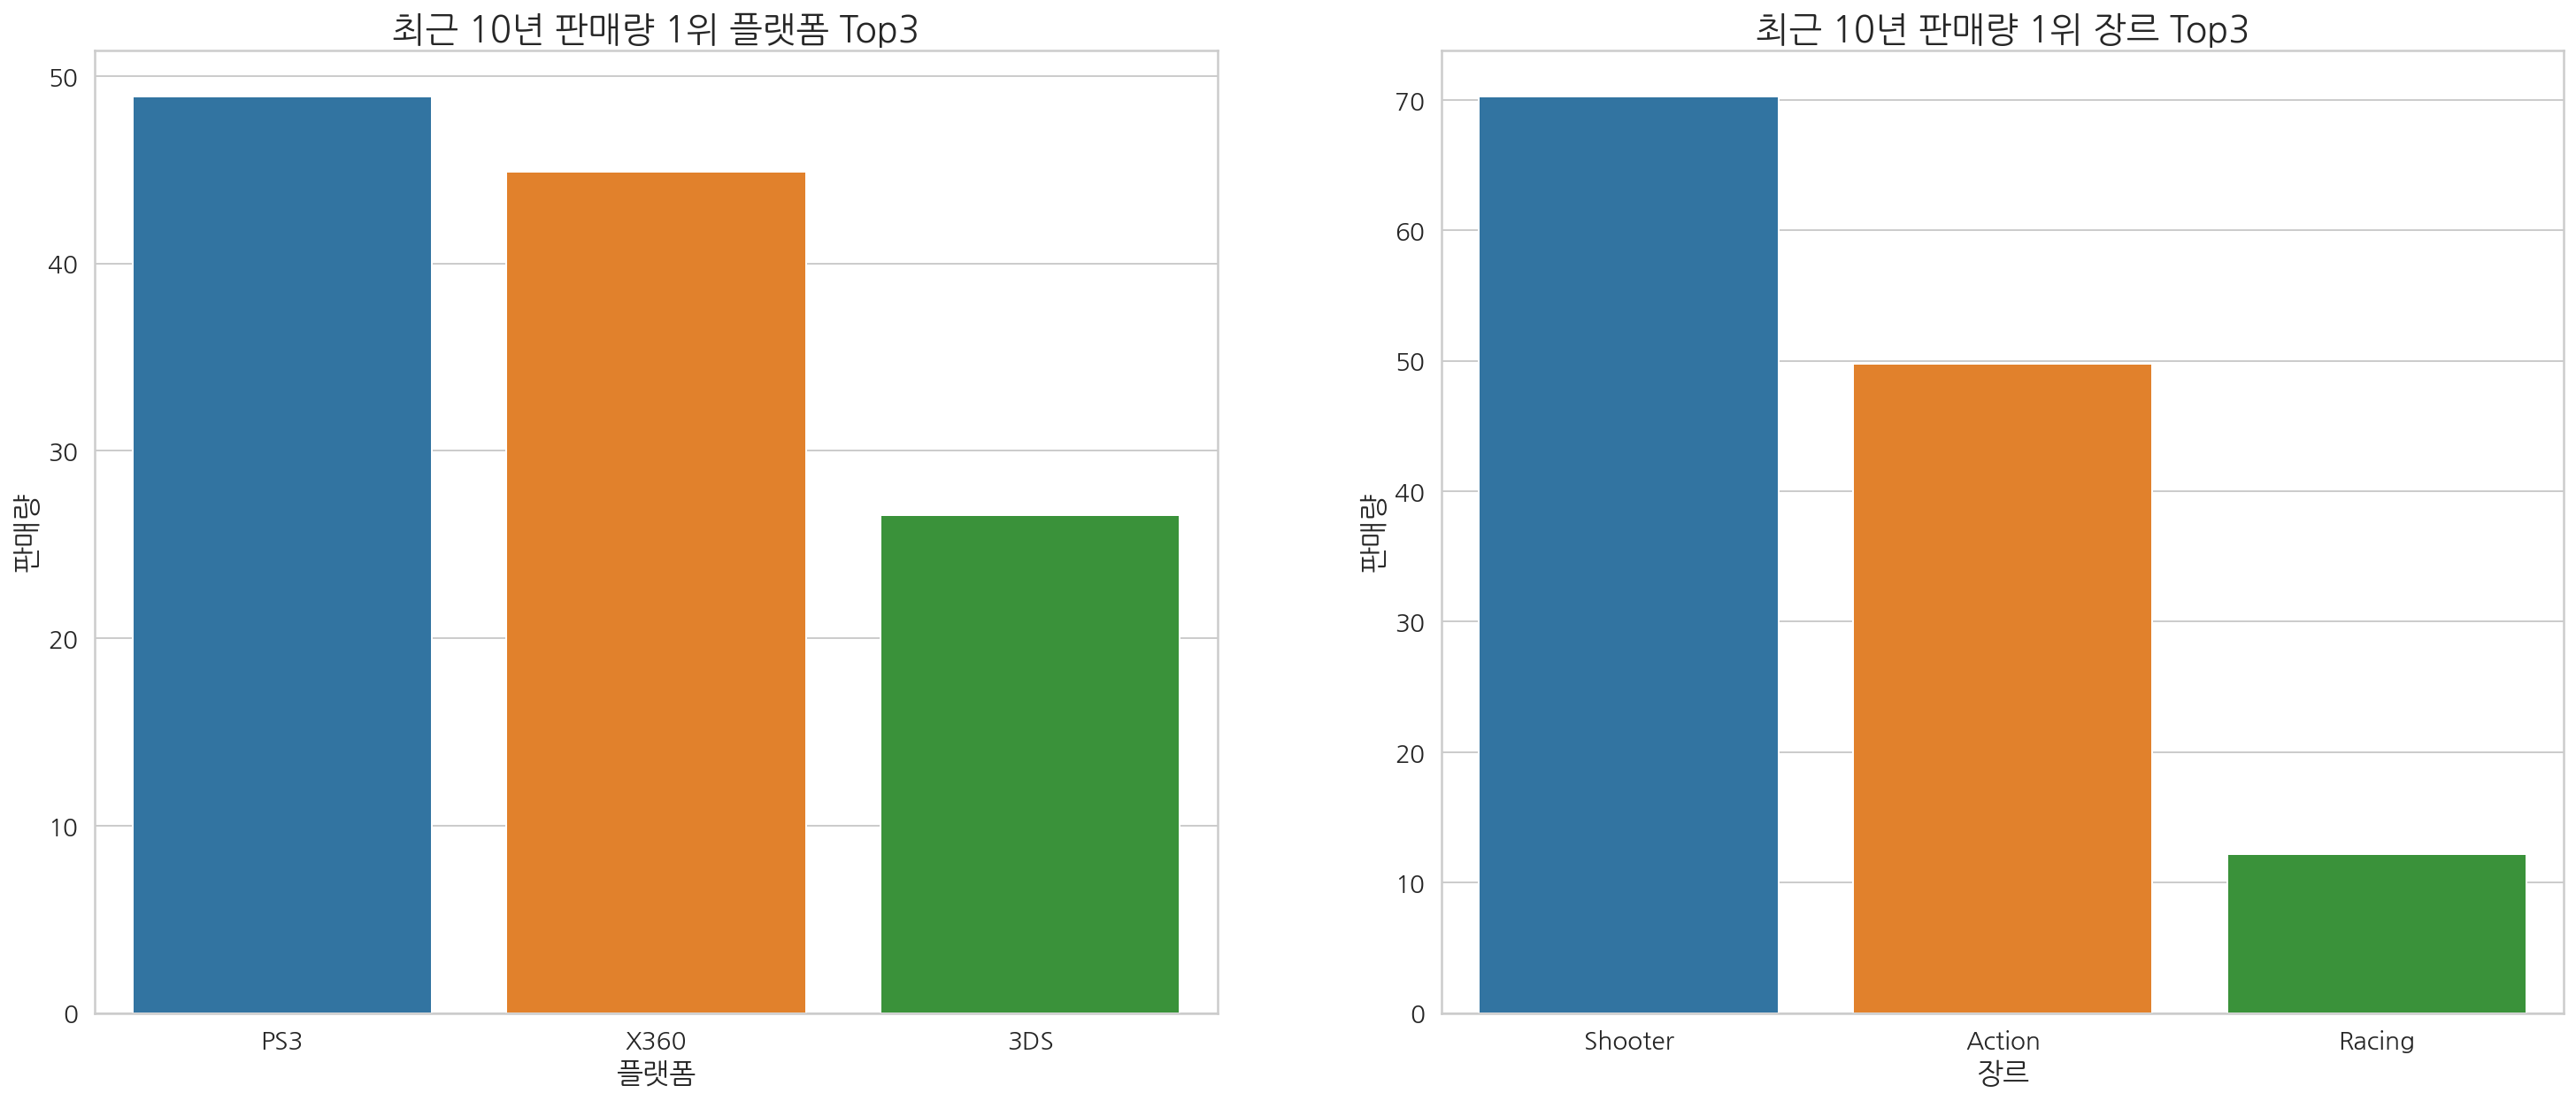

In [97]:
def recent_year_Top3_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(3)

# 최근 10년 플랫폼 판매량 Top3
platform_sales_top3 = recent_year_Top3_sales(df_2011_top10, 'Platform', 'Total_sales')
# 최근 10년 장르 판매량 Top3
genre_sales_top3 = recent_year_Top3_sales(df_2011_top10, 'Genre', 'Total_sales')

data_list = [platform_sales_top3, genre_sales_top3]
titles = ['최근 10년 판매량 1위 플랫폼 Top3', '최근 10년 판매량 1위 장르 Top3']
x_labels = ['플랫폼', '장르']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

다만, 이점에서 이해해야하는 부분이 있는데, CoD가 Shooter로 들어가서 그렇지 Action 부분 안에 FPS 장르가 들어간다. 따라서 Shooter나 Action이나 꽤나 단편적인 정보들 밖에 없어서 그렇지 거의 모든 게임들이 Action으로 취급이 된다는 걸 알아야한다.

---
### 결론

다음 분기에 어떤 게임을 설계해야 하는가?



> 플레이스테이션을 플랫폼으로 기반하여 Action 게임을 만들어야 유리하다.
>
> 또한, 게임에 있어서 플렛포머, 모험 등등 좀 더 상세히 나타낸 자료또한 필요하다.



